
# Part-1

## Defining the Environment and checking if the agent/hero is moving within it.

In [2]:
# Importing the libraries.
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt
class Adventure:
    def __init__(self):
        self.actions=['left','right','up','down']
        self.x=0
        self.y=0
        self.current_state=[self.x,self.y]
        self.length=4
        self.width=4
        self.observation_space=np.zeros((self.length,self.width))
        self.observation_space[3,3]=10
        self.observation_space[0,3]=-3
        self.observation_space[2,3]=-4
        self.observation_space[3,0]=3
        self.observation_space[1,0]=3
        self.observation_space[3,2]=4
        self.terminal_state=[3,3]
        self.reward=0
    
    def prev_step(self):
        old_location=self.current_state
        return old_location

    def step(self,action):
        x,y=self.current_state
        if action=='left':
            if self.prev_step()[1]==0:
                self.x=x
                self.y=y
            else:
                self.x=x
                self.y=y-1
        elif action=='right':
            if self.prev_step()[1]==3:
                self.x=x
                self.y=y
            else:
                self.x=x
                self.y=y+1
        elif action=='up':
            if self.prev_step()[0]==0:
                self.x=x
                self.y=y
            else:
                self.x=x-1
                self.y=y
        elif action=='down':
            if self.prev_step()[0]==3:
                self.x=x
                self.y=y
            else:
                self.x=x+1
                self.y=y  
        self.current_state=[self.x, self.y] 
        return self.current_state,action,self.get_reward(self.current_state)
        
    def get_reward(self,new_state):
        current_reward = self.observation_space[tuple(new_state)]
        self.reward += current_reward
        self.observation_space[tuple(new_state)]=0
        return current_reward
    
    def reset(self):  
        self.x=0
        self.y=0
        self.current_state=[self.x,self.y]
        self.observation_space=np.zeros((4,4))
        self.observation_space[3,3]=10
        self.observation_space[0,3]=-3
        self.observation_space[2,3]=-4
        self.observation_space[3,0]=3
        self.observation_space[3,2]=4
        self.observation_space[1,0]=3
        self.terminal_state=[3,3]
        self.reward=0
        return self.current_state
    
    def render(self):
        space=np.zeros((self.length,self.width))
        space[0,0]=0
        space[3,3]=10
        space[0,3]=-3
        space[2,3]=-4
        space[3,0]=3
        space[3,2]=4
        space[2,3]=-4
        space[1,0]=3
        self.terminal_state=[3,3]
        space[tuple(self.current_state)]=666
        return space  

In [2]:
e=Adventure()
print('Initial State:')
print(e.render())
present=e.reset()
for i in range(10):
    action=random.choice(e.actions)
    present, action, reward =e.step(action)
    print(f'\nIteration-{i}')
    print(f'State:{present}')
    print(f'Action performed:{action}')
    print(f'Reward:{reward}')
    print(e.render())
    

Initial State:
[[666.   0.   0.  -3.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-0
State:[0, 0]
Action performed:up
Reward:0.0
[[666.   0.   0.  -3.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-1
State:[0, 1]
Action performed:right
Reward:0.0
[[  0. 666.   0.  -3.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-2
State:[0, 2]
Action performed:right
Reward:0.0
[[  0.   0. 666.  -3.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-3
State:[0, 3]
Action performed:right
Reward:-3.0
[[  0.   0.   0. 666.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-4
State:[0, 3]
Action performed:right
Reward:0.0
[[  0.   0.   0. 666.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 [  3.   0.   4.  10.]]

Iteration-5
State:[0, 2]
Action performed:left
Reward:0.0
[[  0.   0. 666.  -3.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.  -4.]
 

# Part -2: SARSA (State-Action-Reward-State-Action) Algorithm.

In [3]:
class Sarsa():
    def __init__(self, env, alpha, gamma, epsilon, epsilon_decay):
        self.env = env
        self.alpha = alpha  
        self.gamma = gamma  
        self.epsilon = epsilon
        self.epsilon_decay= epsilon_decay
        self.Q = dict() 
        for i in range(4): 
            for j in range(4):
                self.Q[(i,j)] = {'left':0, 'right':0, 'up':0, 'down':0} 

    def epsilon_greedy(self, state,epsilon):
        if np.random.uniform(0, 1) < epsilon:
            action = random.choice(self.env.actions)
        else:
            q_state = self.Q[tuple(state)]
            m = max(q_state.values())
            action = random.choice([key for key, value in q_state.items() if value == m])
        return action

    def train(self, max_timesteps, num_of_episodes):
        reward_plot=[]
        for ep in range(num_of_episodes):
            state = self.env.reset()
            ep_ep = self.epsilon*(self.epsilon_decay**ep)
            action = self.epsilon_greedy(state,ep_ep)
            c=0
            ep_reward=0
            while c <= max_timesteps:
                if self.env.current_state==self.env.terminal_state:
                    break
                next_state, _ , reward = self.env.step(action)
                next_action = self.epsilon_greedy(next_state,ep_ep)
                current_q = self.Q[tuple(state)][action] 
                next_q = self.Q[tuple(next_state)][next_action]
                td_target = reward + self.gamma * next_q
                td_error = td_target - current_q
                self.Q[tuple(state)][action] += self.alpha * td_error
                state = next_state
                action = next_action
                c+=1
                ep_reward += reward
            reward_plot.append(ep_reward)
        return reward_plot
    

Evaluating Sarsa



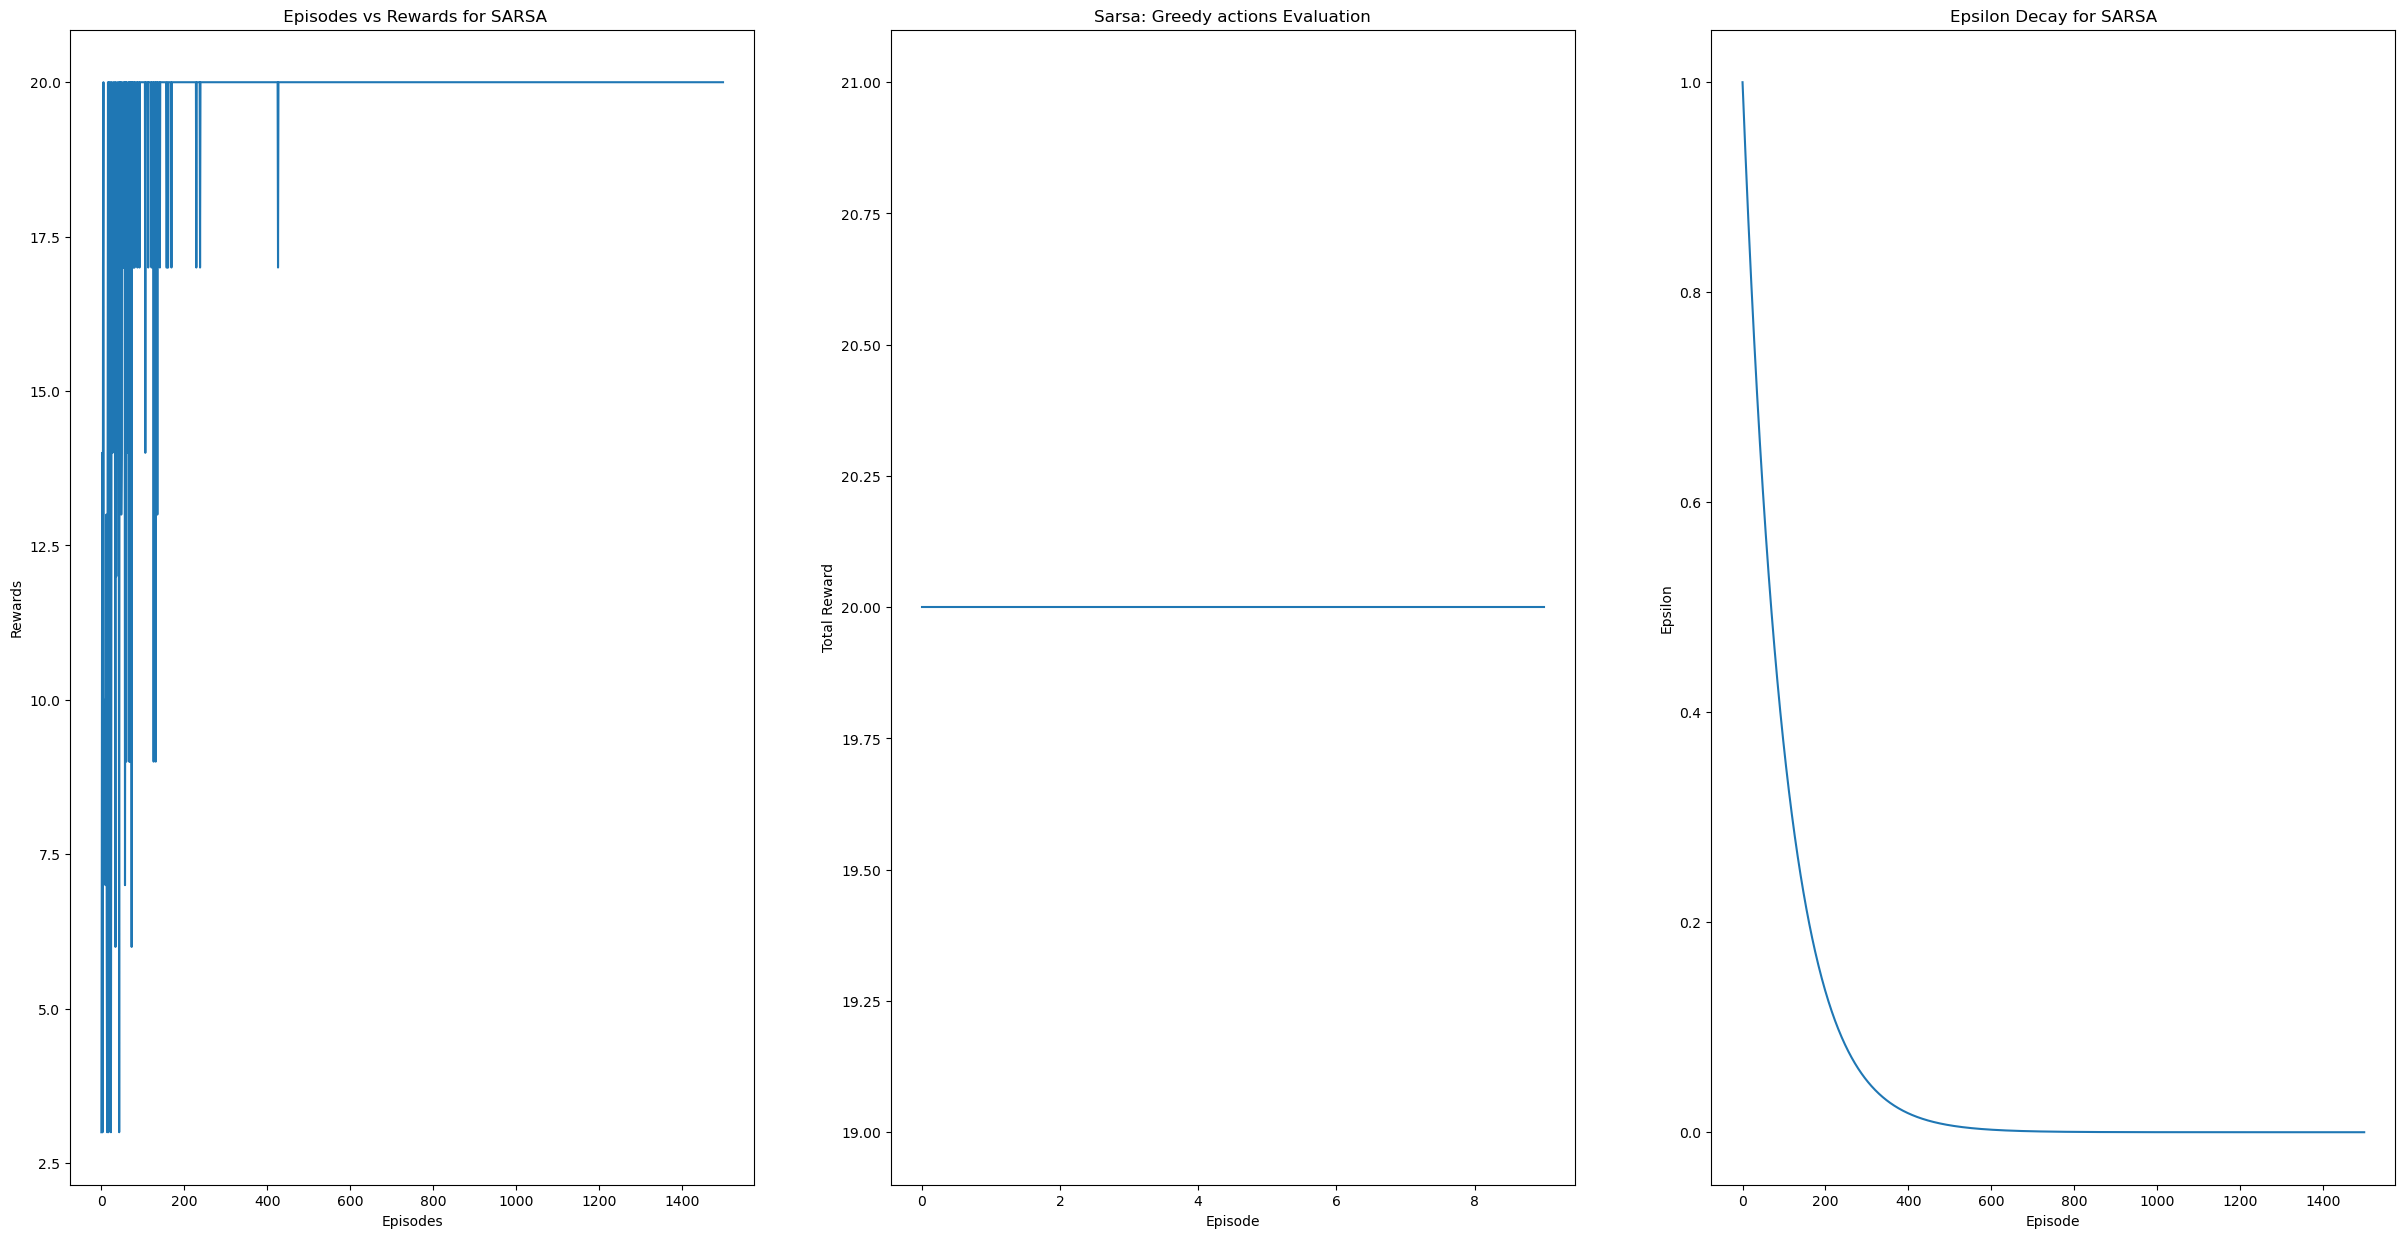

In [4]:
env = Adventure()
sarsa_agent = Sarsa(env,alpha=0.05, gamma=0.9, epsilon=1,epsilon_decay=0.99)
p= sarsa_agent.train(100,1500)


# testing for sarsa
print("Evaluating Sarsa")
print()
total_rewards = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards.append(ep_reward)

# Epsilon Decay for sarsa
epsilon_list = []
for ep in range(len(p)):
    epsilon_list.append(sarsa_agent.epsilon*(sarsa_agent.epsilon_decay**ep))


plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p)
plt.title(' Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')  
plt.subplot(1,3,2)
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list)
plt.title('Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

### Hyper parameter tunning for sarsa

Evaluating Sarsa



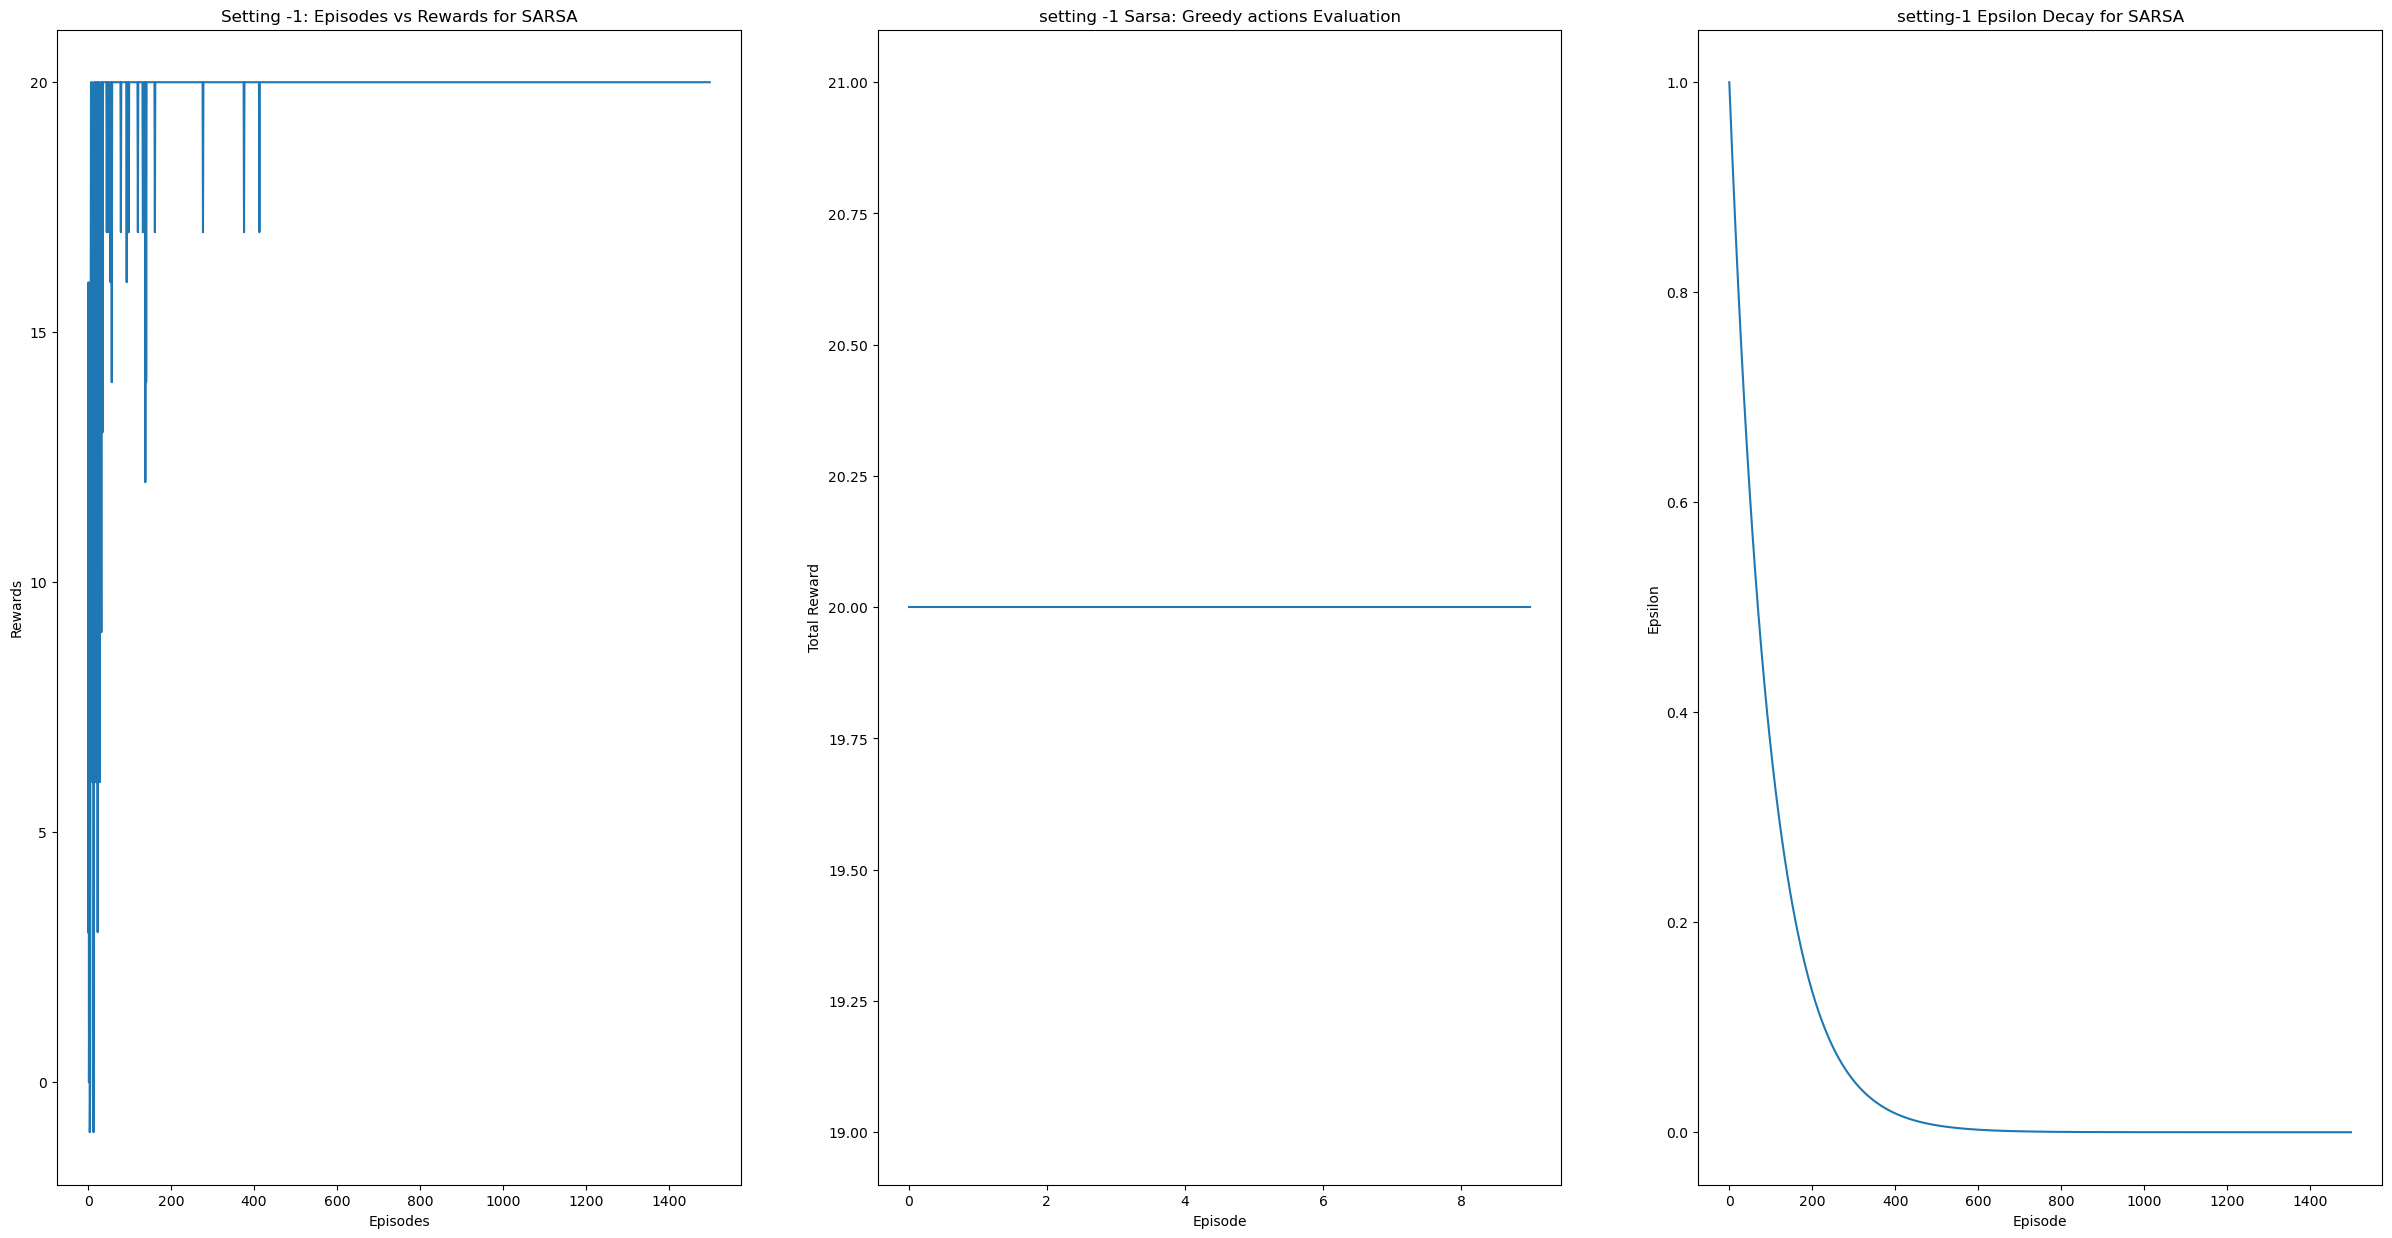

In [5]:
env = Adventure()
# Setting -1
# Rewards vs Episodes.
sarsa_agent1 = Sarsa(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p1=sarsa_agent1.train(50,1500)
# print(p1)
# # sarsa_agent1.Q


# testing
print("Evaluating Sarsa")
print()
total_rewards1 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent1.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards1.append(ep_reward)

# Epsilon Decay for setting 1
epsilon_list1 = []
for ep in range(len(p1)):
    epsilon_list1.append(sarsa_agent1.epsilon*(sarsa_agent1.epsilon_decay**ep))

    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p1)
plt.title('Setting -1: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -1 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list1)
plt.title('setting-1 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()


Evaluating Sarsa



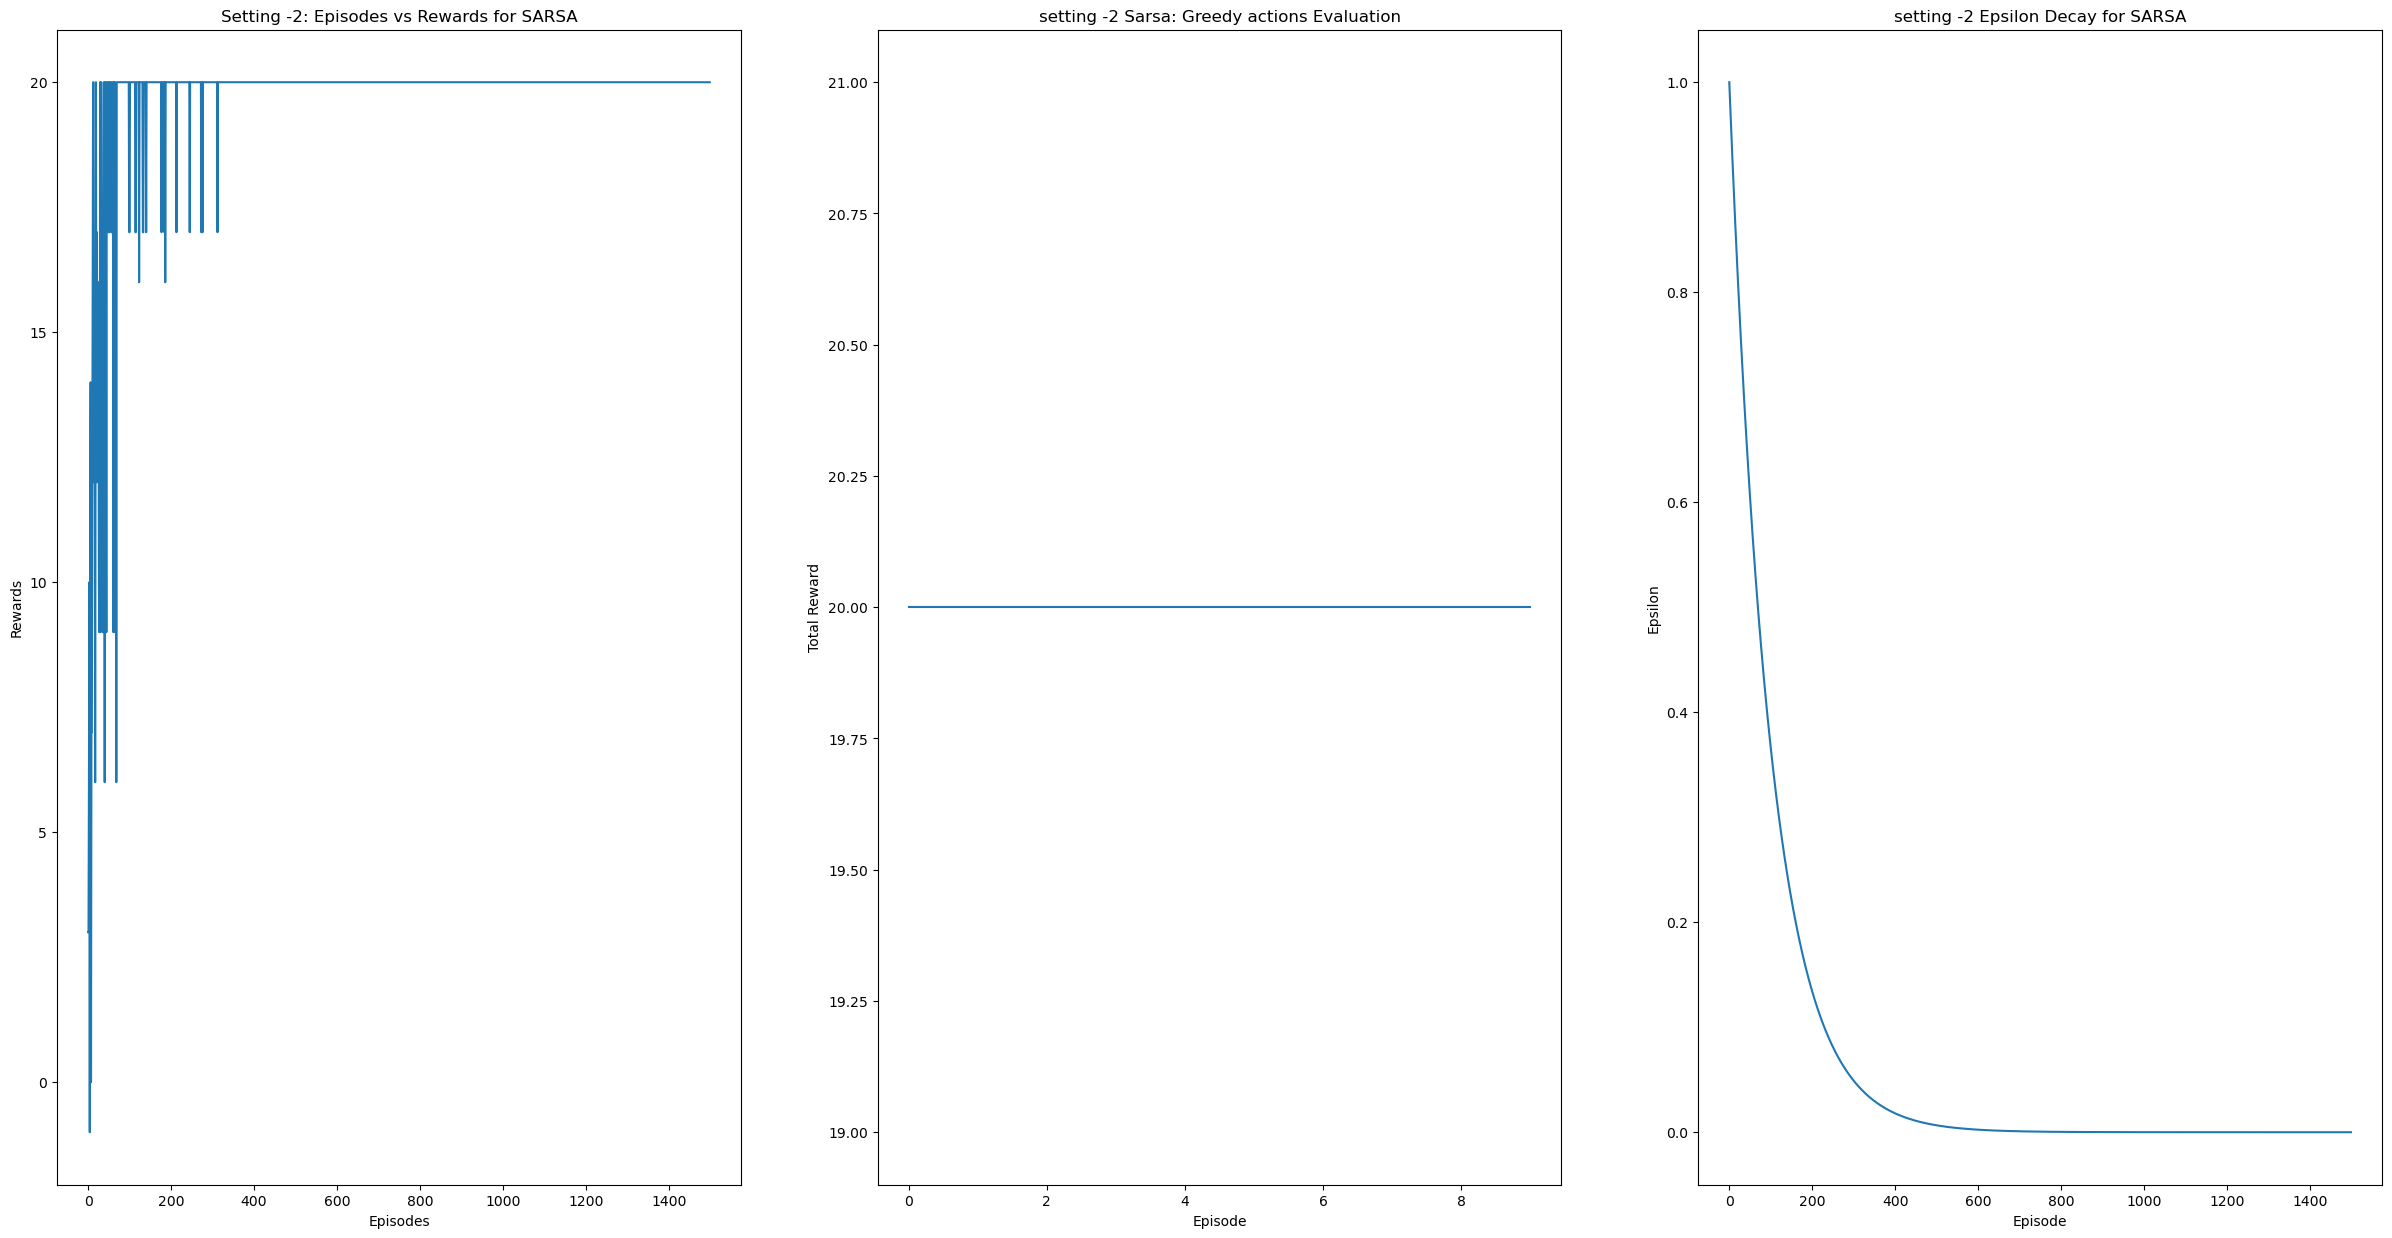

In [6]:
# Setting -2
sarsa_agent2 = Sarsa(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p2=sarsa_agent2.train(80,1500)

# testing
print("Evaluating Sarsa")
print()
total_rewards2 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent2.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards2.append(ep_reward)
    
# Epsilon Decay for setting 2
epsilon_list2 = []
for ep in range(len(p2)):
    epsilon_list2.append(sarsa_agent2.epsilon*(sarsa_agent2.epsilon_decay**ep))

plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p2)
plt.title('Setting -2: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -2 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list2)
plt.title('setting -2 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()



Evaluating Sarsa



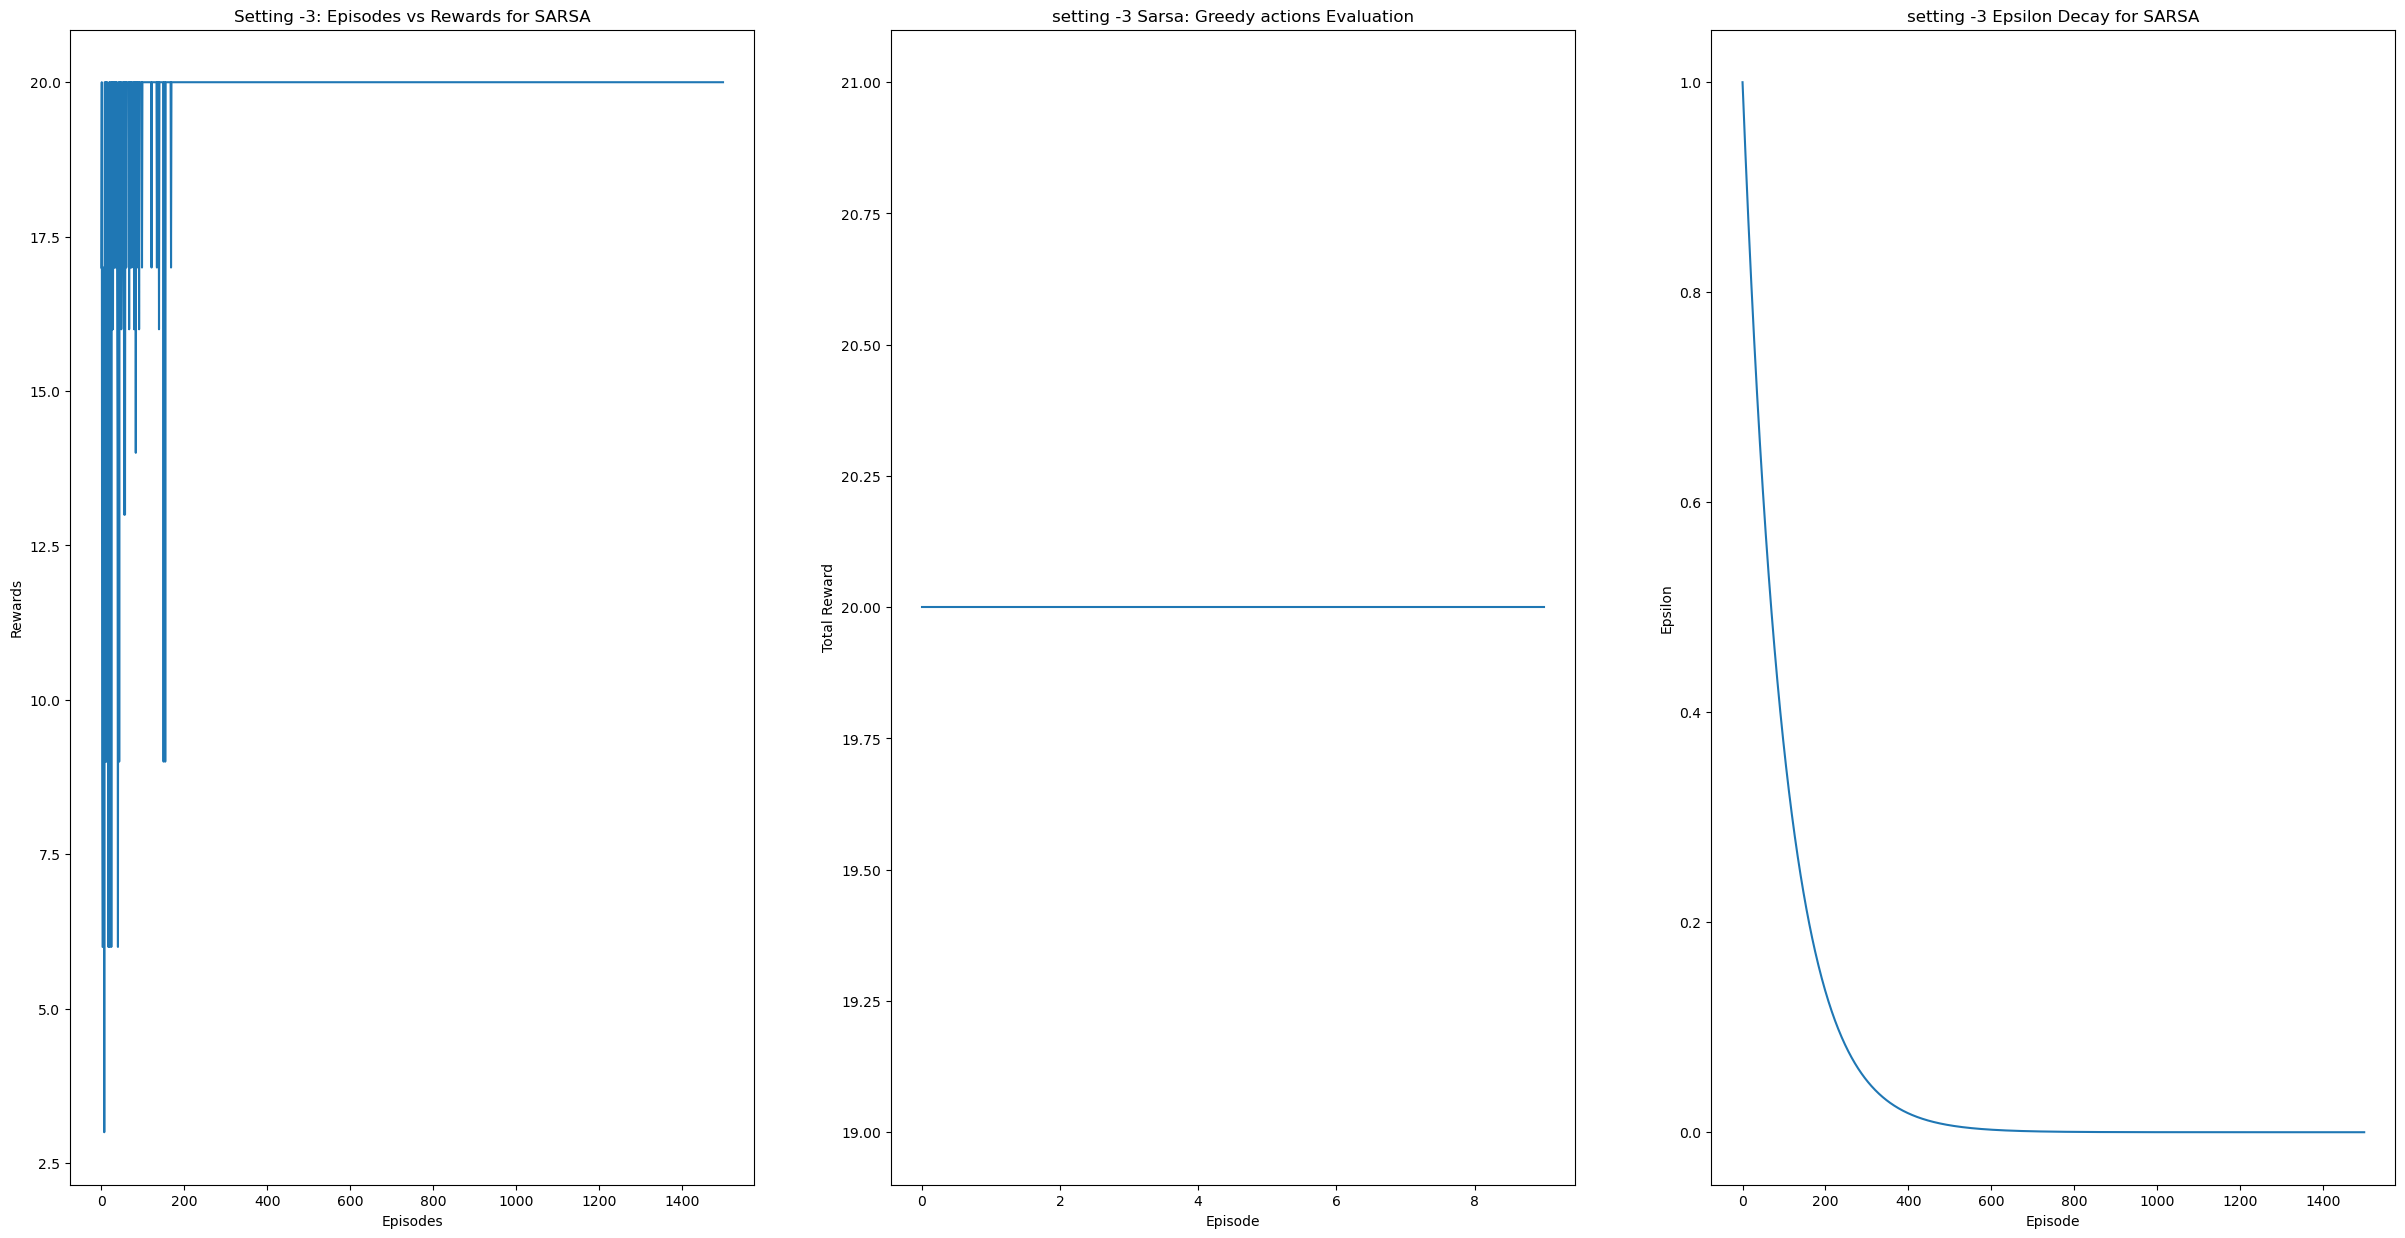

In [27]:
# Setting -3
sarsa_agent3 = Sarsa(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p3=sarsa_agent3.train(150,1500)

# testing
print("Evaluating Sarsa")
print()
total_rewards3 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent3.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards3.append(ep_reward)
    
# Epsilon Decay for setting 3
epsilon_list3 = []
for ep in range(len(p3)):
    epsilon_list3.append(sarsa_agent3.epsilon*(sarsa_agent3.epsilon_decay**ep))

plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p3)
plt.title('Setting -3: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -3 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list3)
plt.title('setting -3 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()



Evaluating Sarsa



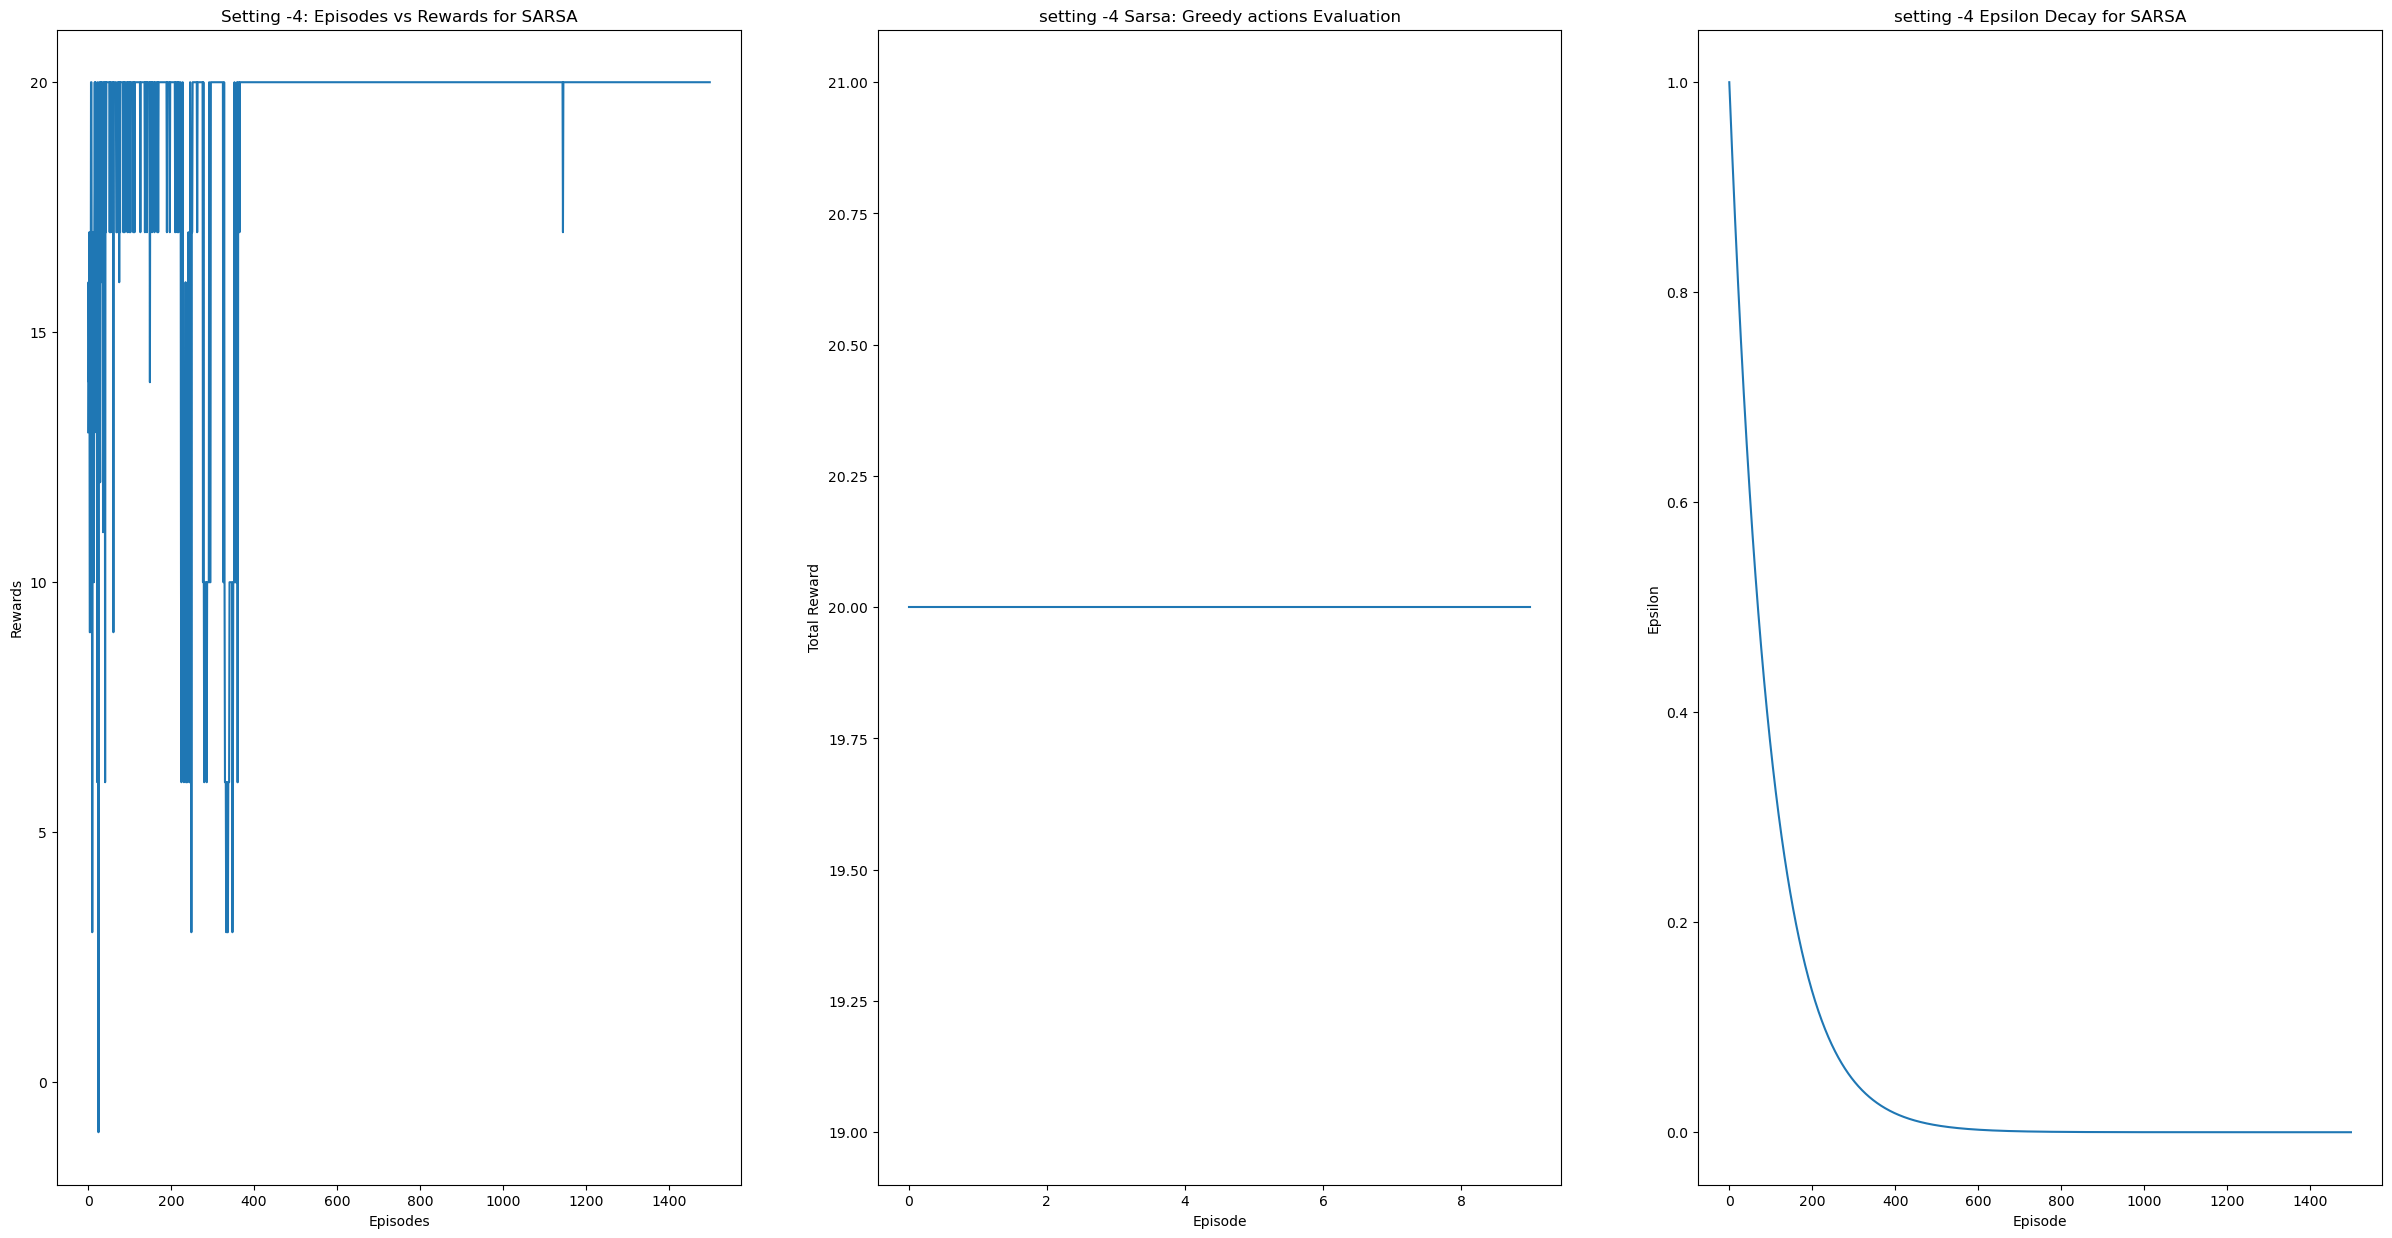

In [8]:
# Setting -4

sarsa_agent4 = Sarsa(env,alpha=0.15, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p4=sarsa_agent4.train(100,1500)

# testing
print("Evaluating Sarsa")
print()
total_rewards4 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent4.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards4.append(ep_reward)
    
# Epsilon Decay for setting 4
epsilon_list4 = []
for ep in range(len(p4)):
    epsilon_list4.append(sarsa_agent4.epsilon*(sarsa_agent4.epsilon_decay**ep))

plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p4)
plt.title('Setting -4: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards4)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -4 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list4)
plt.title('setting -4 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()



Evaluating Sarsa



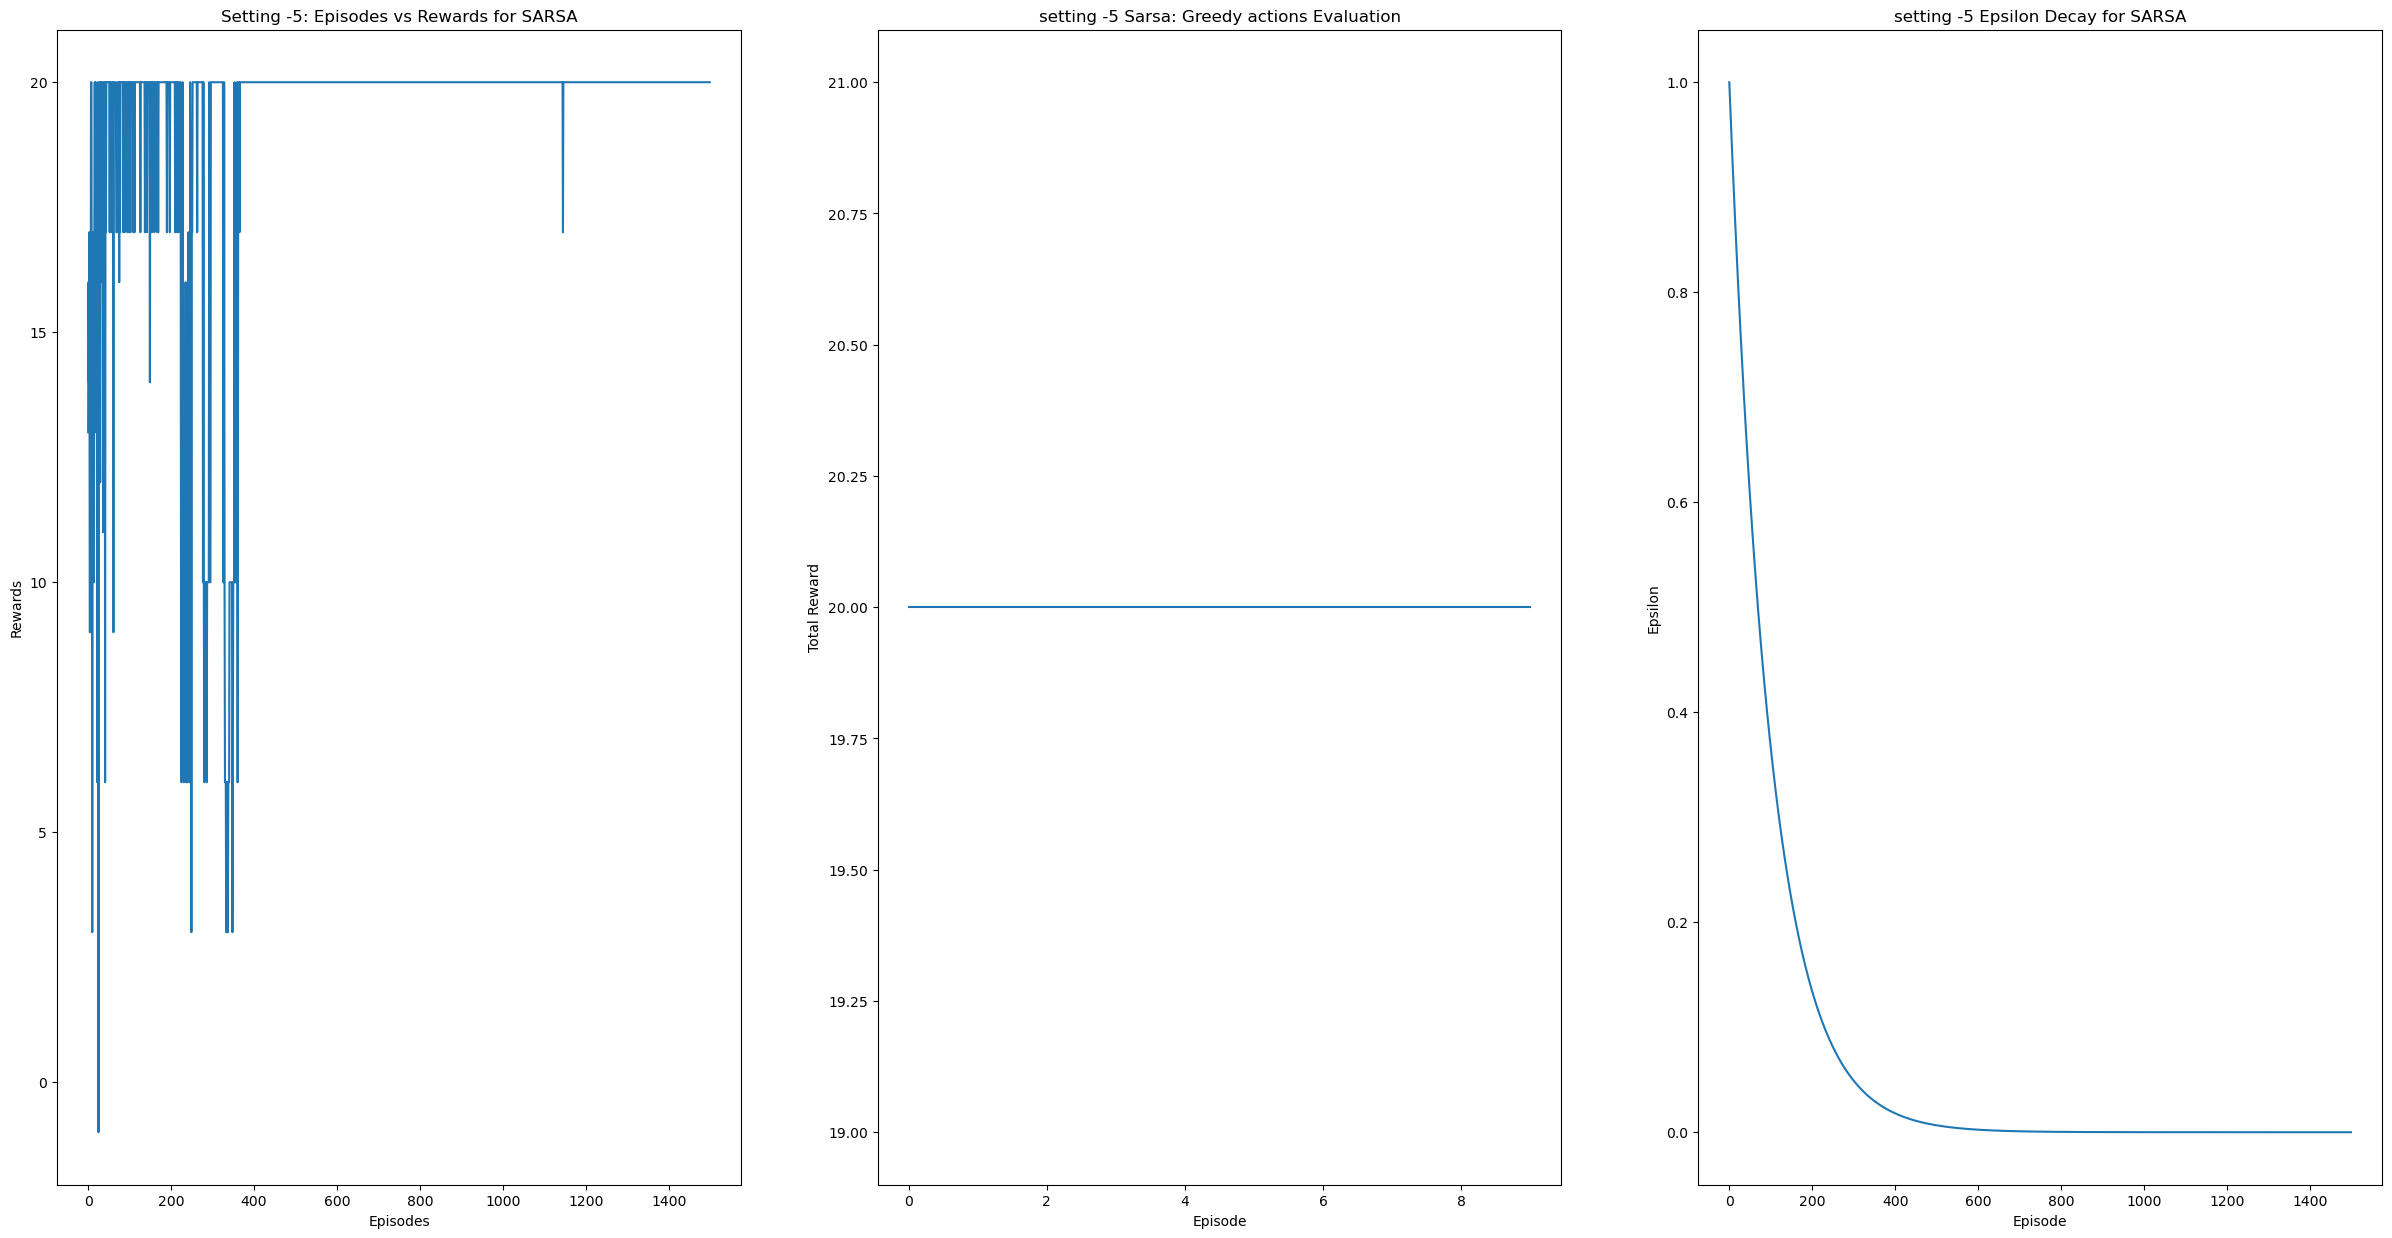

In [9]:
# Setting -5
sarsa_agent5 = Sarsa(env,alpha=0.07, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p5=sarsa_agent5.train(100,1500)

# testing
print("Evaluating Sarsa")
print()
total_rewards5 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent5.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards5.append(ep_reward)
    
# Epsilon Decay for setting 5
epsilon_list5 = []
for ep in range(len(p5)):
    epsilon_list5.append(sarsa_agent5.epsilon*(sarsa_agent5.epsilon_decay**ep))

plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p4)
plt.title('Setting -5: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards4)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -5 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list5)
plt.title('setting -5 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()



Evaluating Sarsa



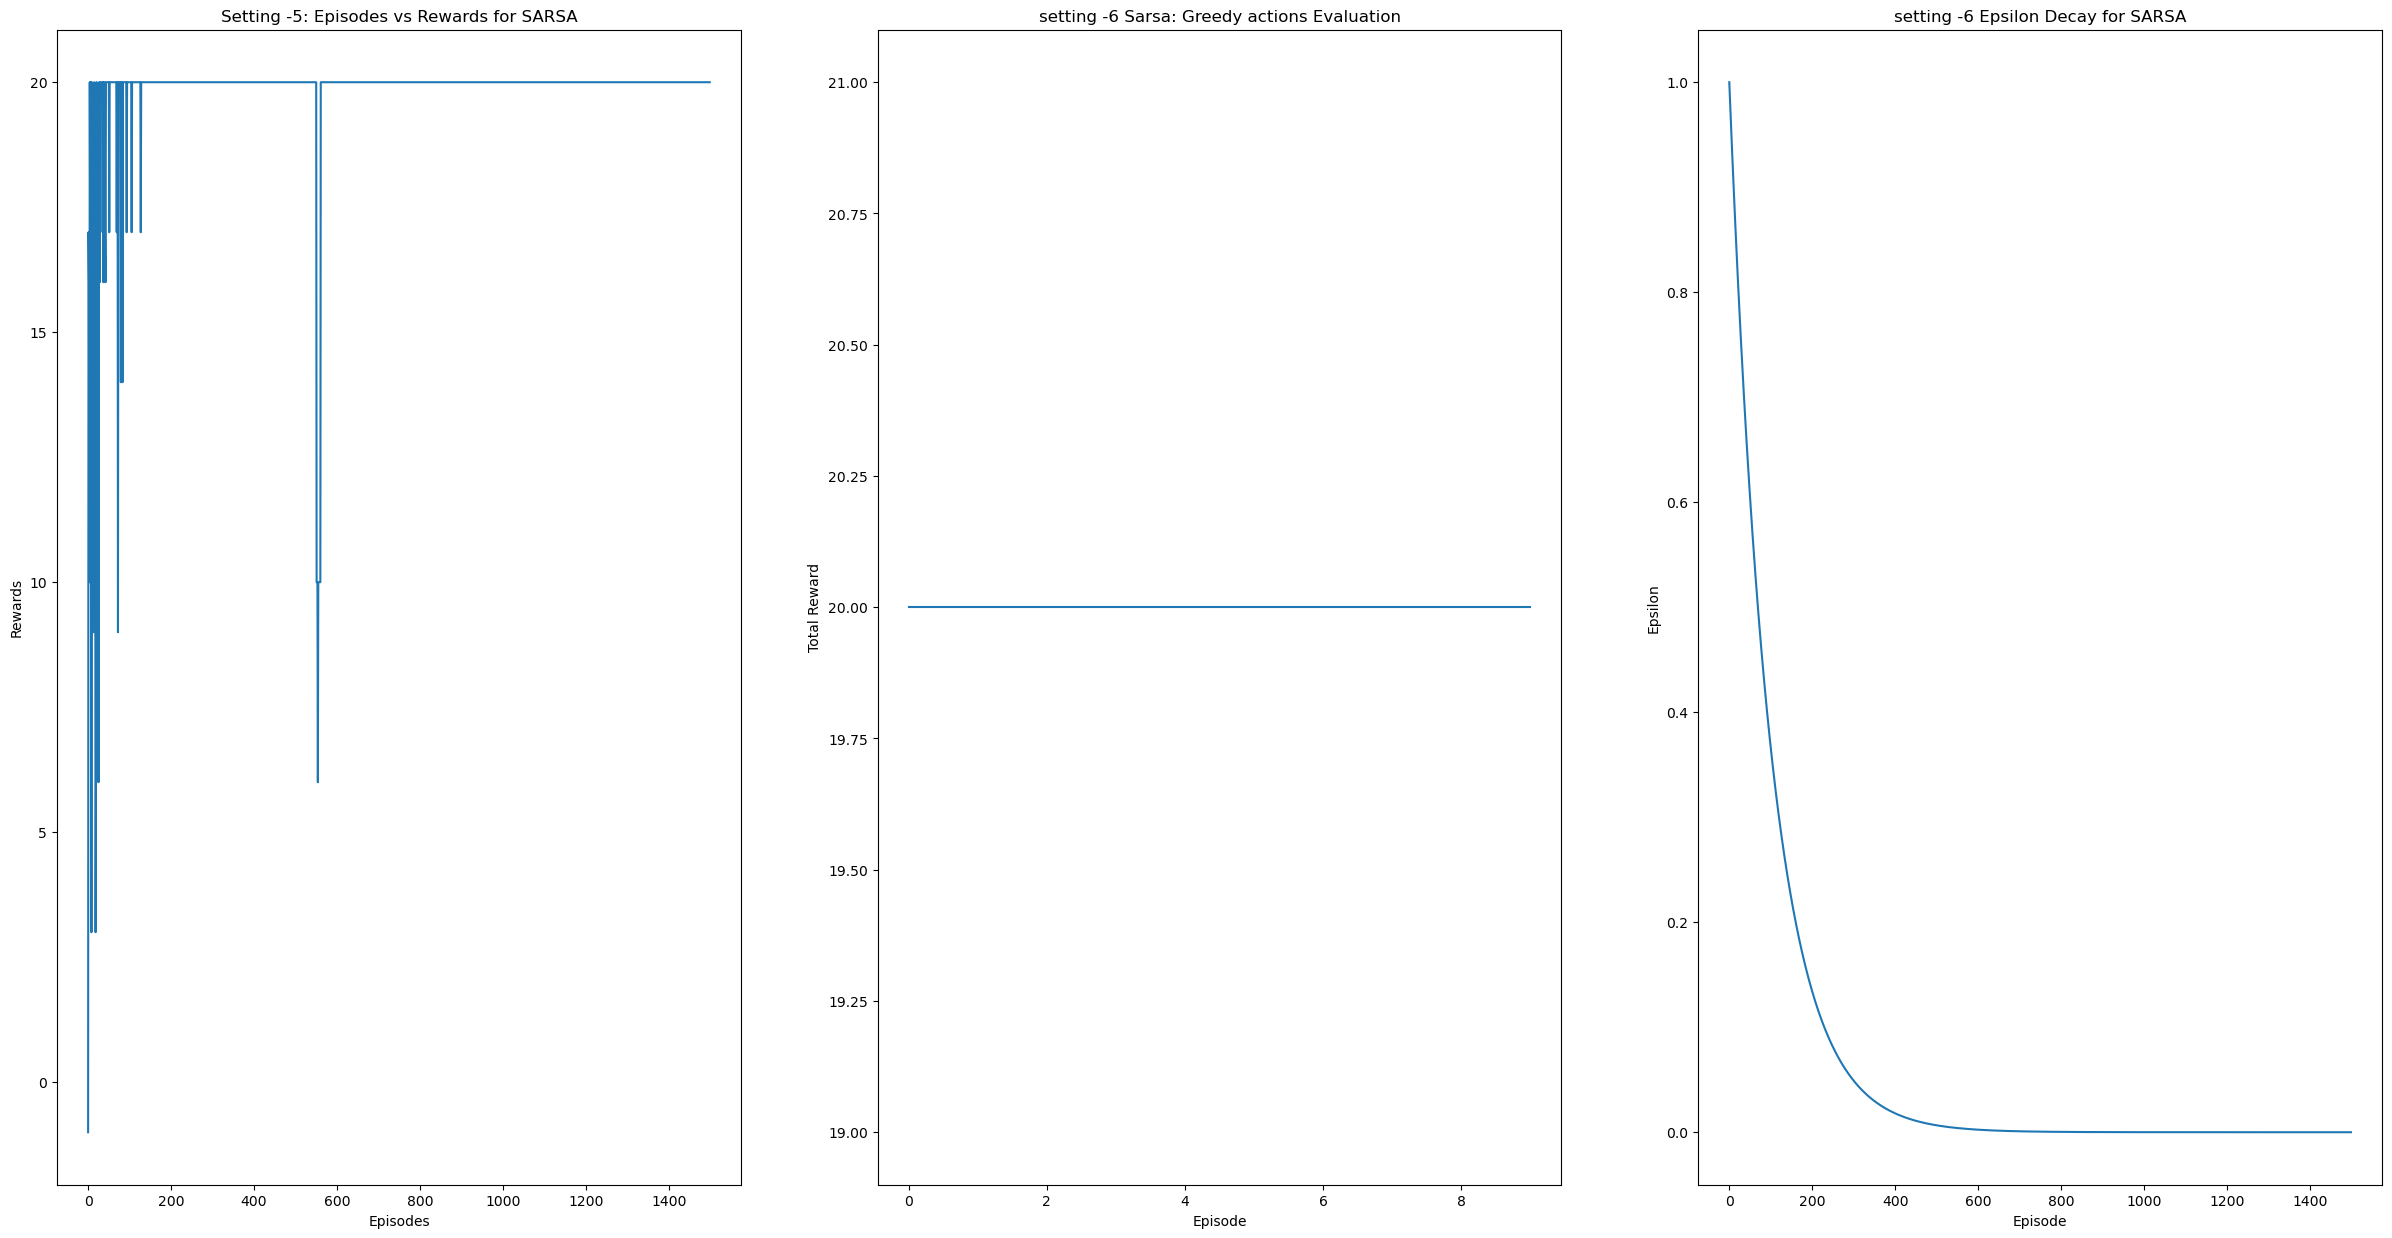

In [10]:
# Setting -6
sarsa_agent6 = Sarsa(env,alpha=0.1, gamma=0.99, epsilon=1,epsilon_decay=0.99)
p6=sarsa_agent6.train(100,1500)

# testing
print("Evaluating Sarsa")
print()
total_rewards6 = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent6.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards6.append(ep_reward)
    
# Epsilon Decay for setting 6
epsilon_list6 = []
for ep in range(len(p5)):
    epsilon_list6.append(sarsa_agent6.epsilon*(sarsa_agent6.epsilon_decay**ep))

plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(p6)
plt.title('Setting -5: Episodes vs Rewards for SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards6)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -6 Sarsa: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list6)
plt.title('setting -6 Epsilon Decay for SARSA')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()



Evaluating Sarsa



Text(0.5, 1.0, 'Sarsa: Greedy actions Evaluation')

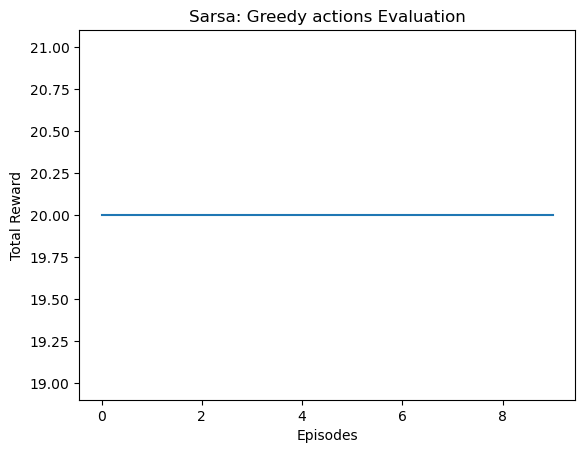

In [11]:
#greedy for sarasa

# testing for sarsa
print("Evaluating Sarsa")
print()
total_rewards_greedy = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = sarsa_agent.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_greedy.append(ep_reward)

plt.plot(total_rewards_greedy)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Sarsa: Greedy actions Evaluation')

As we can see from the graph, that the agent has chosen greedy actions from the learned policy of Sarsa and obtained max rewards of the environment which is 20.  

# Part-3: Q-learning Algorithm.

In [12]:
class Qlearning:
    def __init__(self, env, alpha, gamma, epsilon, epsilon_decay):
        self.env = env
        self.alpha = alpha  
        self.gamma = gamma  
        self.epsilon = epsilon
        self.epsilon_decay=epsilon_decay
        self.Q = dict() 
        for i in range(4): 
            for j in range(4):
                self.Q[(i,j)]={'left':0, 'right':0, 'up':0, 'down':0} 
    
    def epsilon_greedy(self, state,epsilon):
        if np.random.uniform(0, 1) < epsilon:
            action = random.choice(self.env.actions)
        else:
            q_state = self.Q[tuple(state)]
            m = max(q_state.values())
            action = random.choice([key for key, value in q_state.items() if value == m])
        return action
    
    def train(self, max_timesteps, num_of_episodes):
        reward_plot=[]
        # ep_reward=0
        for ep in range(num_of_episodes):
            state = self.env.reset()
            ep_ep = self.epsilon*(self.epsilon_decay**ep)
            t=0
            ep_reward=0
            while t<=max_timesteps:
                if self.env.current_state==self.env.terminal_state:
                    break
                action = self.epsilon_greedy(state,ep_ep)
                next_state, _, reward = self.env.step(action)
                current_q = self.Q[tuple(state)][action]
                self.Q[tuple(state)][action] = current_q + self.alpha*(reward +self.gamma*(max(self.Q[tuple(next_state)].values()))-current_q)
                state = next_state
                t+=1
                ep_reward += reward
            reward_plot.append(ep_reward)
        return reward_plot

Evaluating Q-Learning



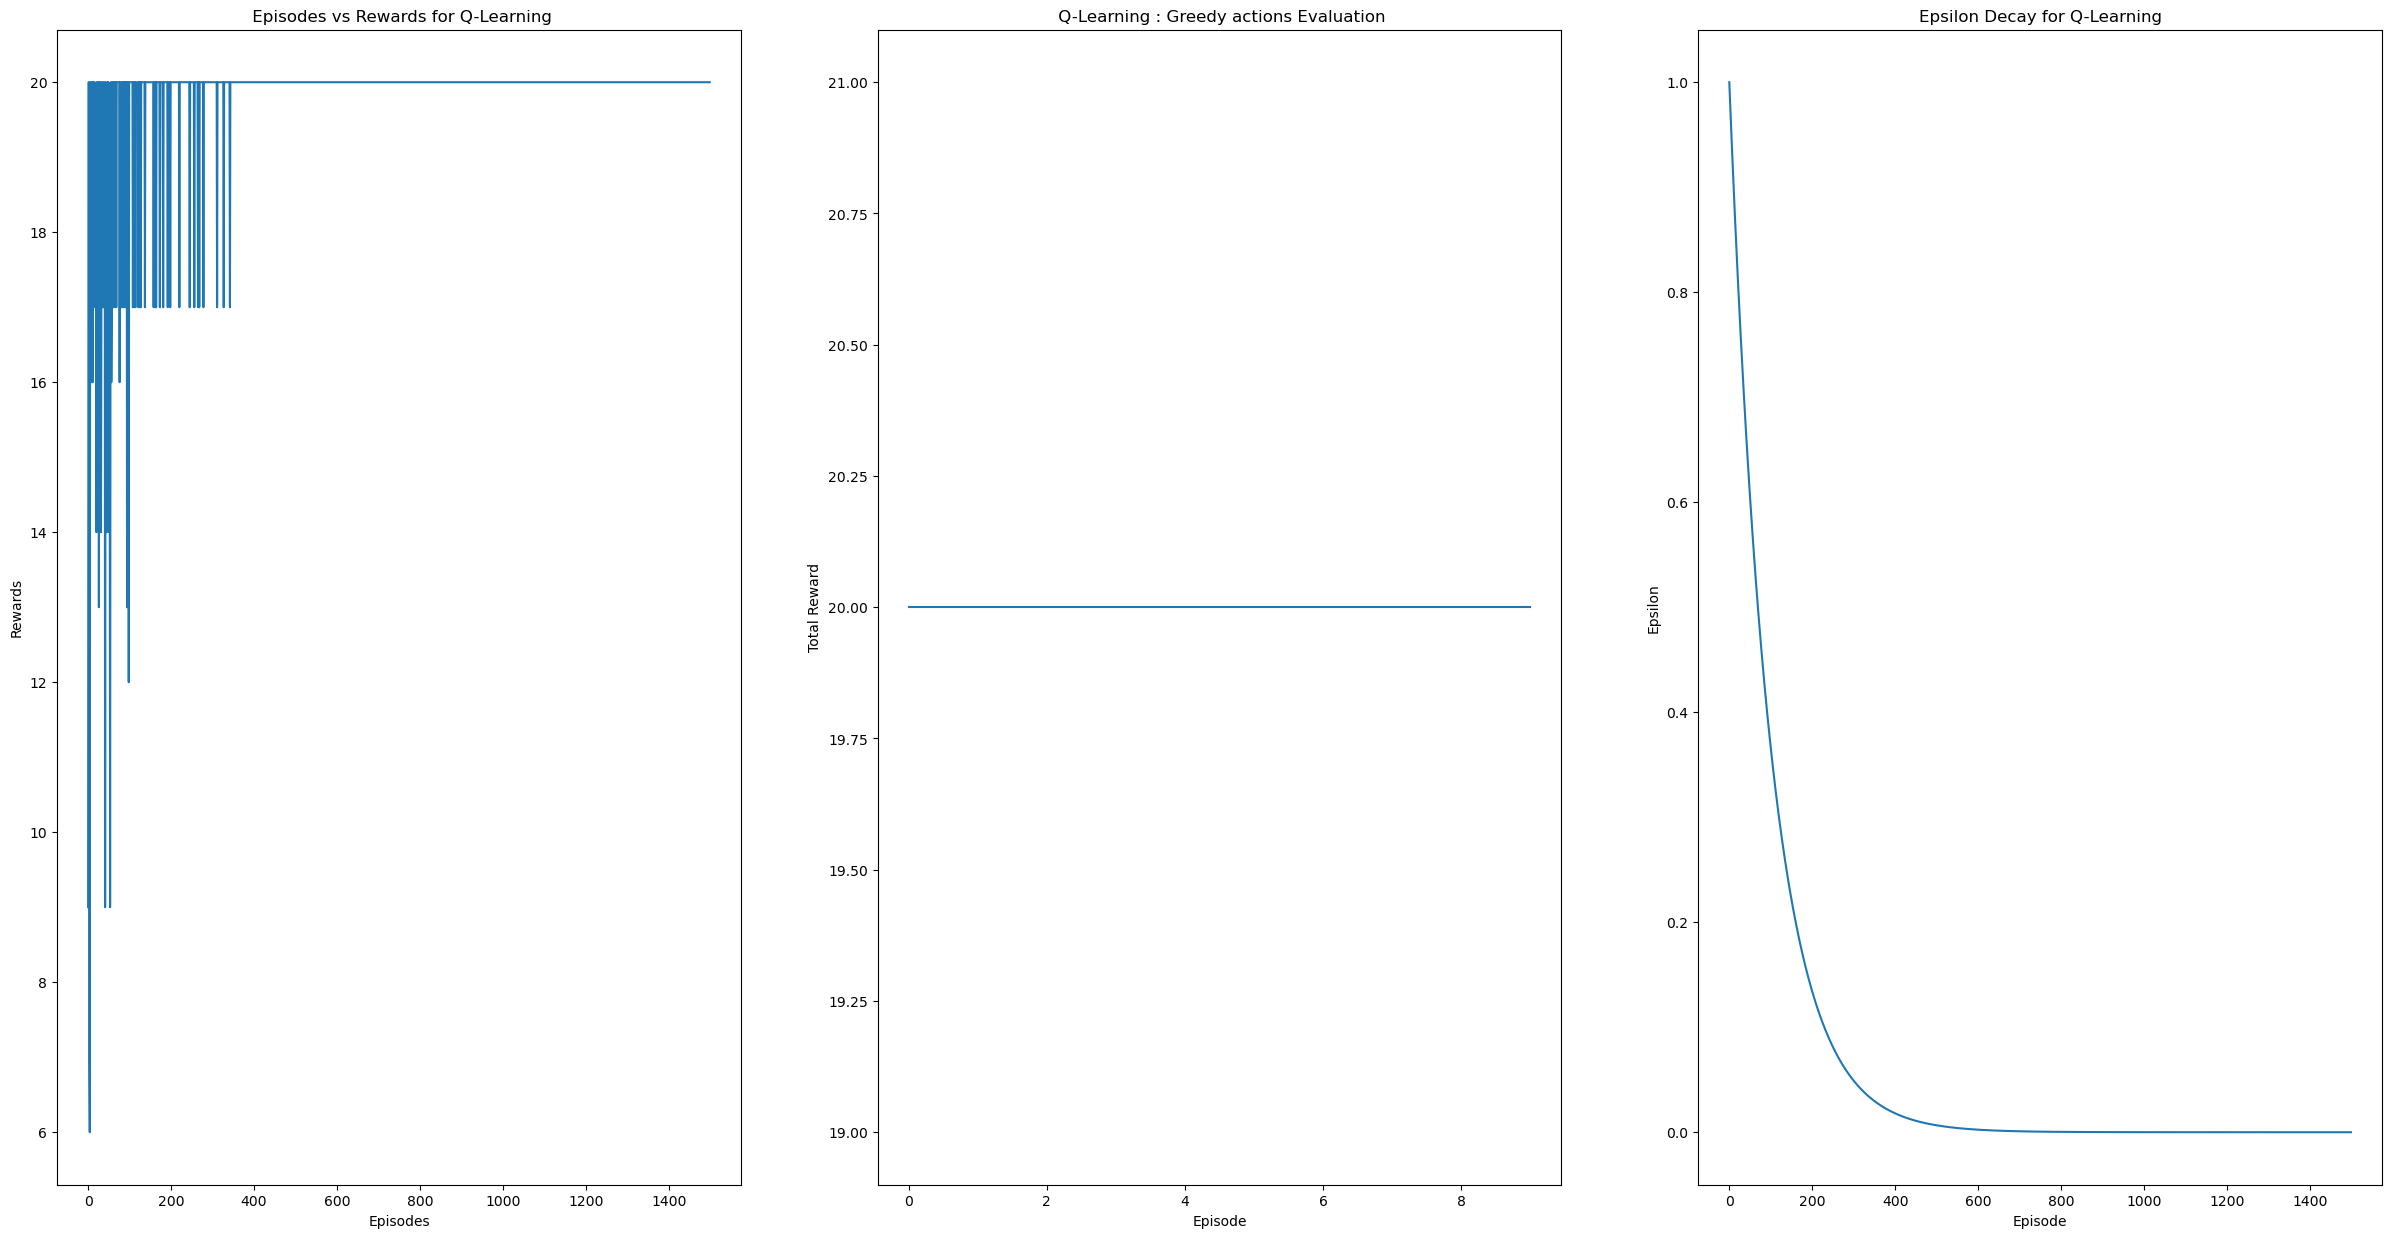

In [13]:
env = Adventure()
q_agent = Qlearning(env,alpha=0.05, gamma=0.9, epsilon=1,epsilon_decay=0.99)
q=q_agent.train(100,1500)

#evaluating the Q-Learning
print("Evaluating Q-Learning")
print()
total_rewards_Q=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q.append(ep_reward)


epsilon_list_Q = []
for ep in range(len(q)):
    epsilon_list_Q.append(q_agent.epsilon*(q_agent.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q)
plt.title(' Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title(' Q-Learning : Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q)
plt.title('Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning



Text(0.5, 1.0, 'Sarsa: Q-Learning actions Evaluation')

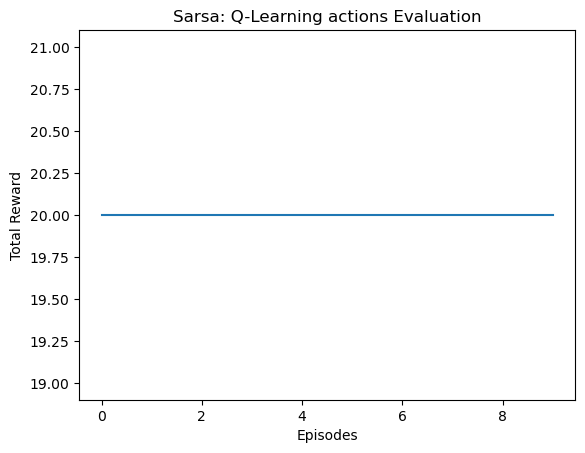

In [30]:
#greedy for Q-Learning

# testing for Q-Learning
print("Evaluating Q-Learning")
print()
total_rewards_Qgreedy = []
for i in range(10):
    state = env.reset()
    done = False
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Qgreedy.append(ep_reward)

plt.plot(total_rewards_Qgreedy)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Sarsa: Q-Learning actions Evaluation')

As we can see from the graph, that the agent has chosen greedy actions from the learned policy of Q-Learning and obtained max rewards of the environment which is 20.  

### Hyper paramater tunning for Q_Learning

Evaluating Q-Learning setting-1



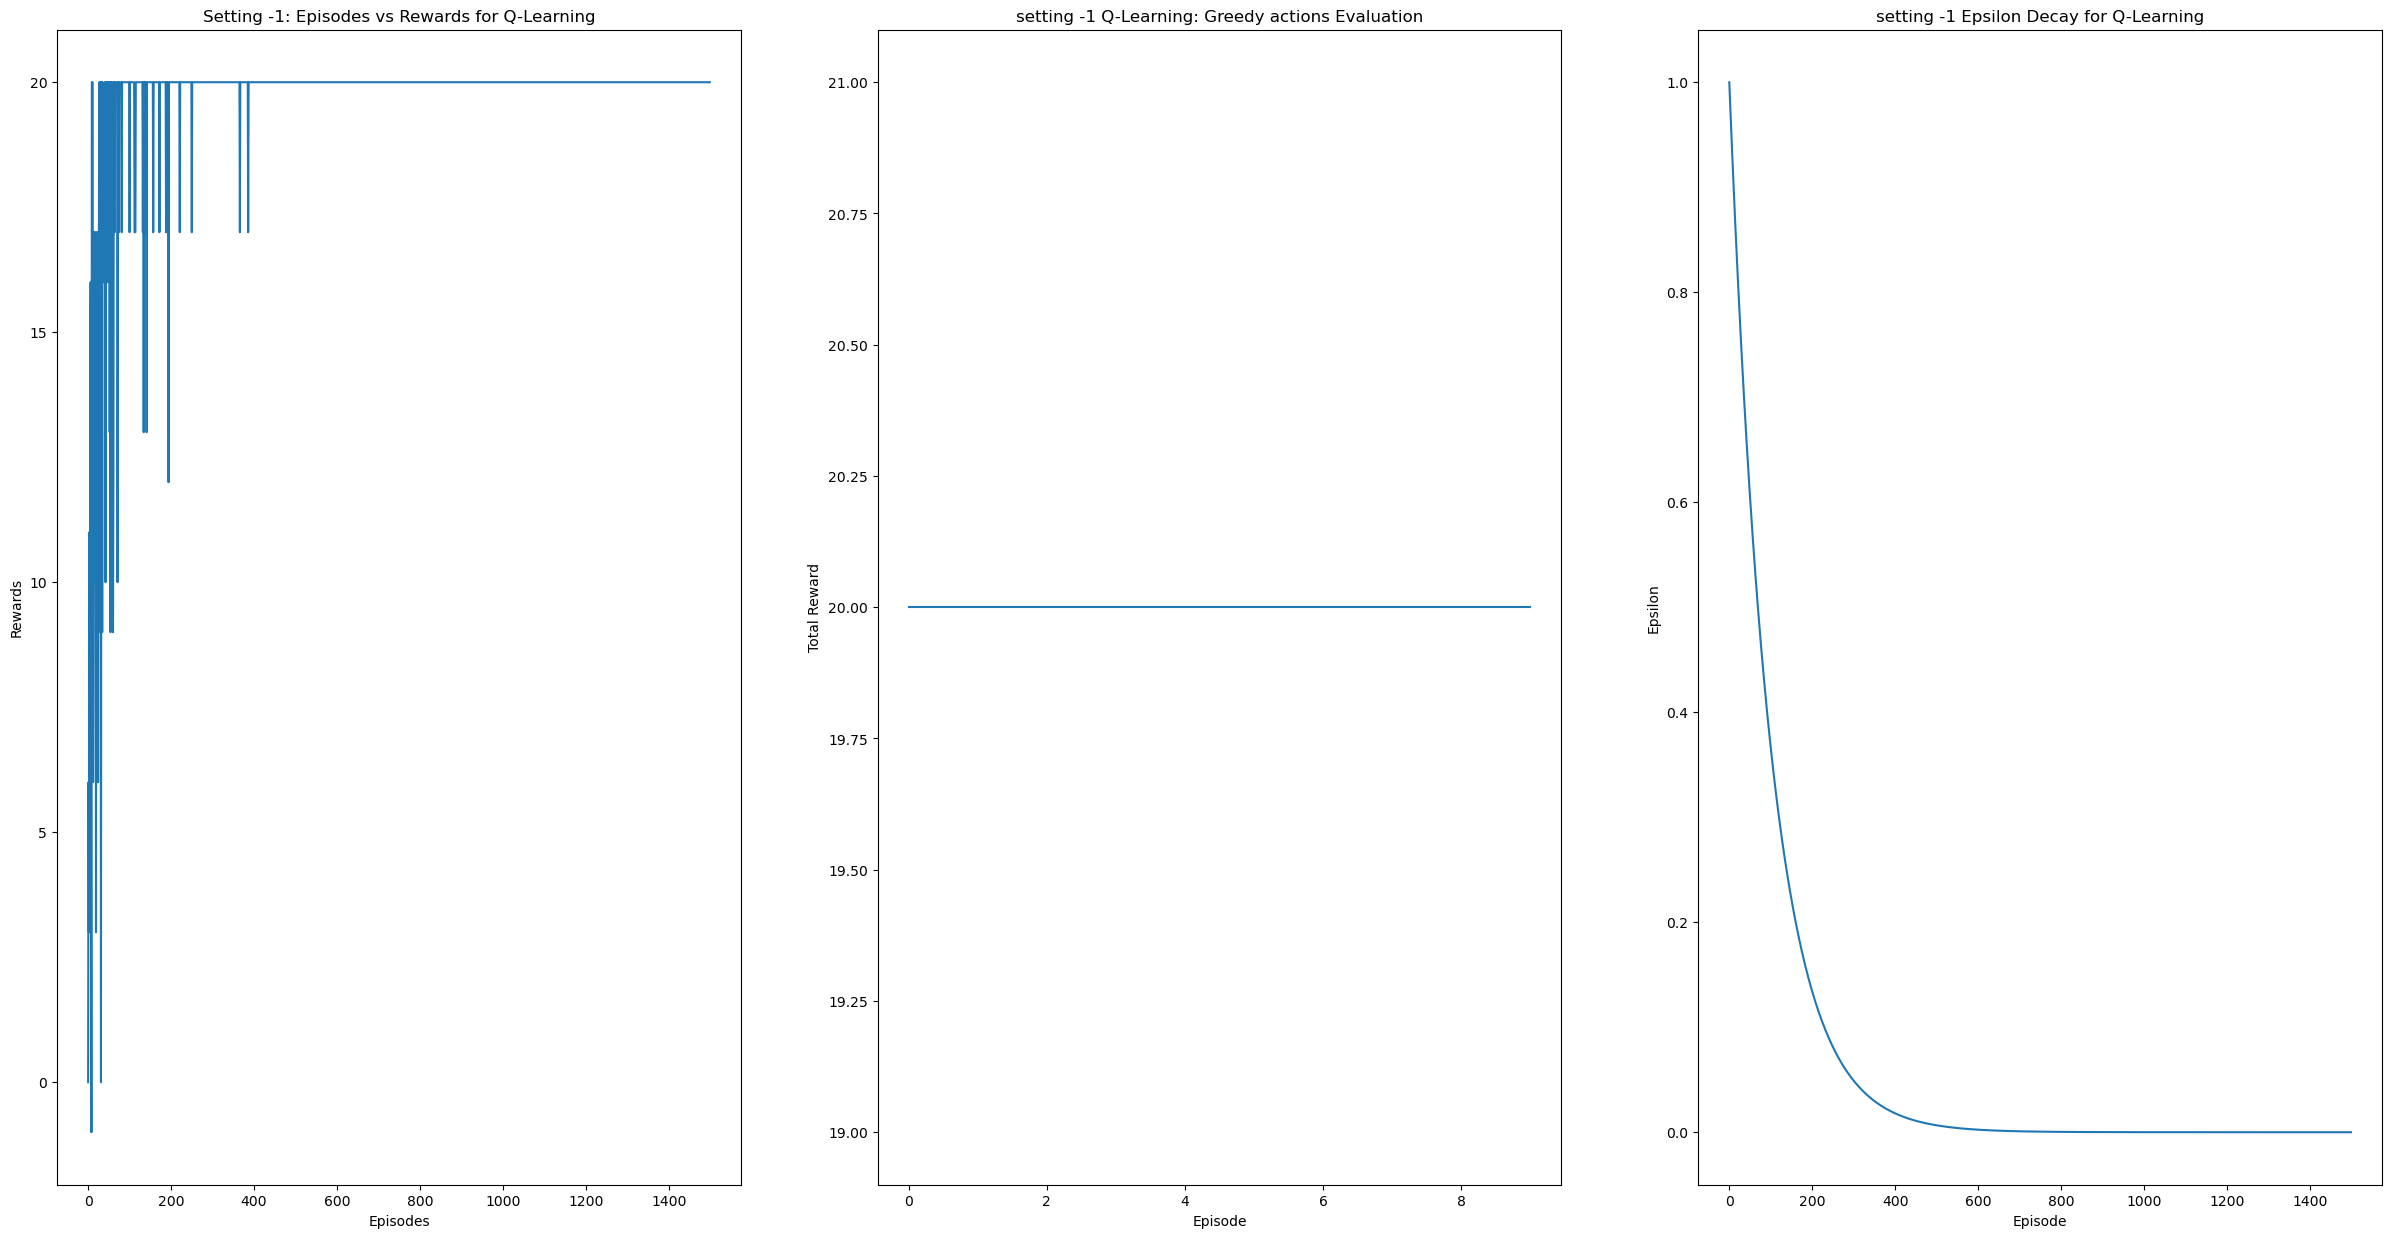

In [22]:
#setting -1
q_agent1 = Qlearning(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
q1=q_agent1.train(50,1500)

#evaluating the Q-Learning for setting-1
print("Evaluating Q-Learning setting-1")
print()
total_rewards_Q1=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent1.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q1.append(ep_reward)


epsilon_list_Q1 = []
for ep in range(len(q1)):
    epsilon_list_Q1.append(q_agent1.epsilon*(q_agent1.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q1)
plt.title('Setting -1: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -1 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q1)
plt.title('setting -1 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning setting-2



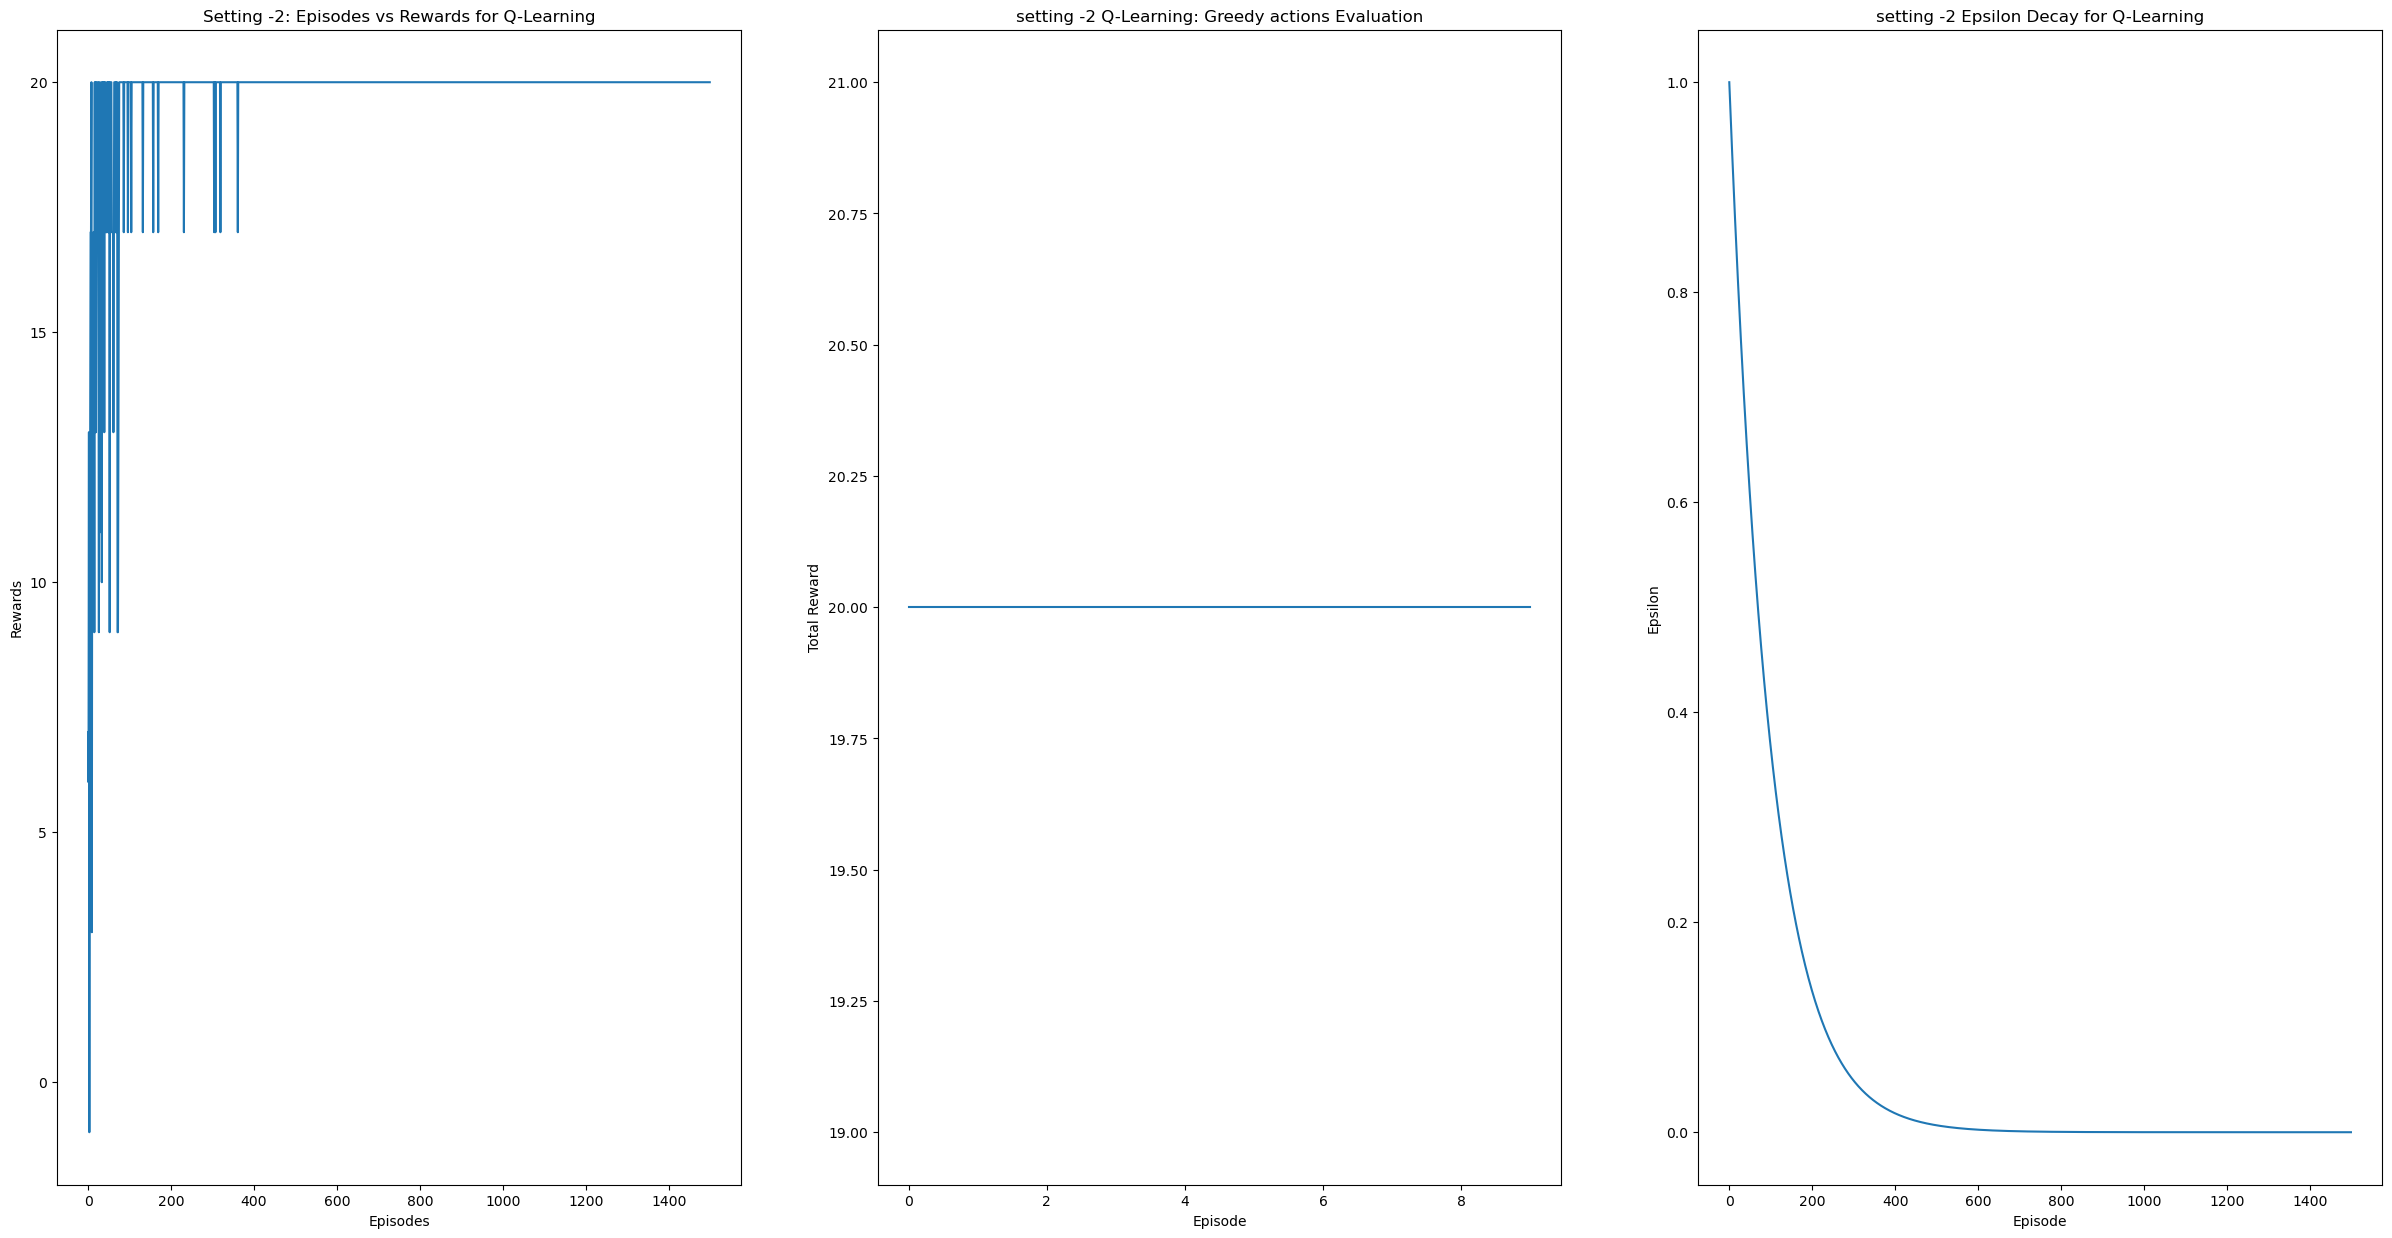

In [15]:
#setting -2
q_agent2 = Qlearning(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
q2=q_agent2.train(80,1500)

#evaluating the Q-Learning for setting-2
print("Evaluating Q-Learning setting-2")
print()
total_rewards_Q2=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent2.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q2.append(ep_reward)


epsilon_list_Q2 = []
for ep in range(len(q2)):
    epsilon_list_Q2.append(q_agent2.epsilon*(q_agent2.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q2)
plt.title('Setting -2: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -2 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q2)
plt.title('setting -2 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning setting-3



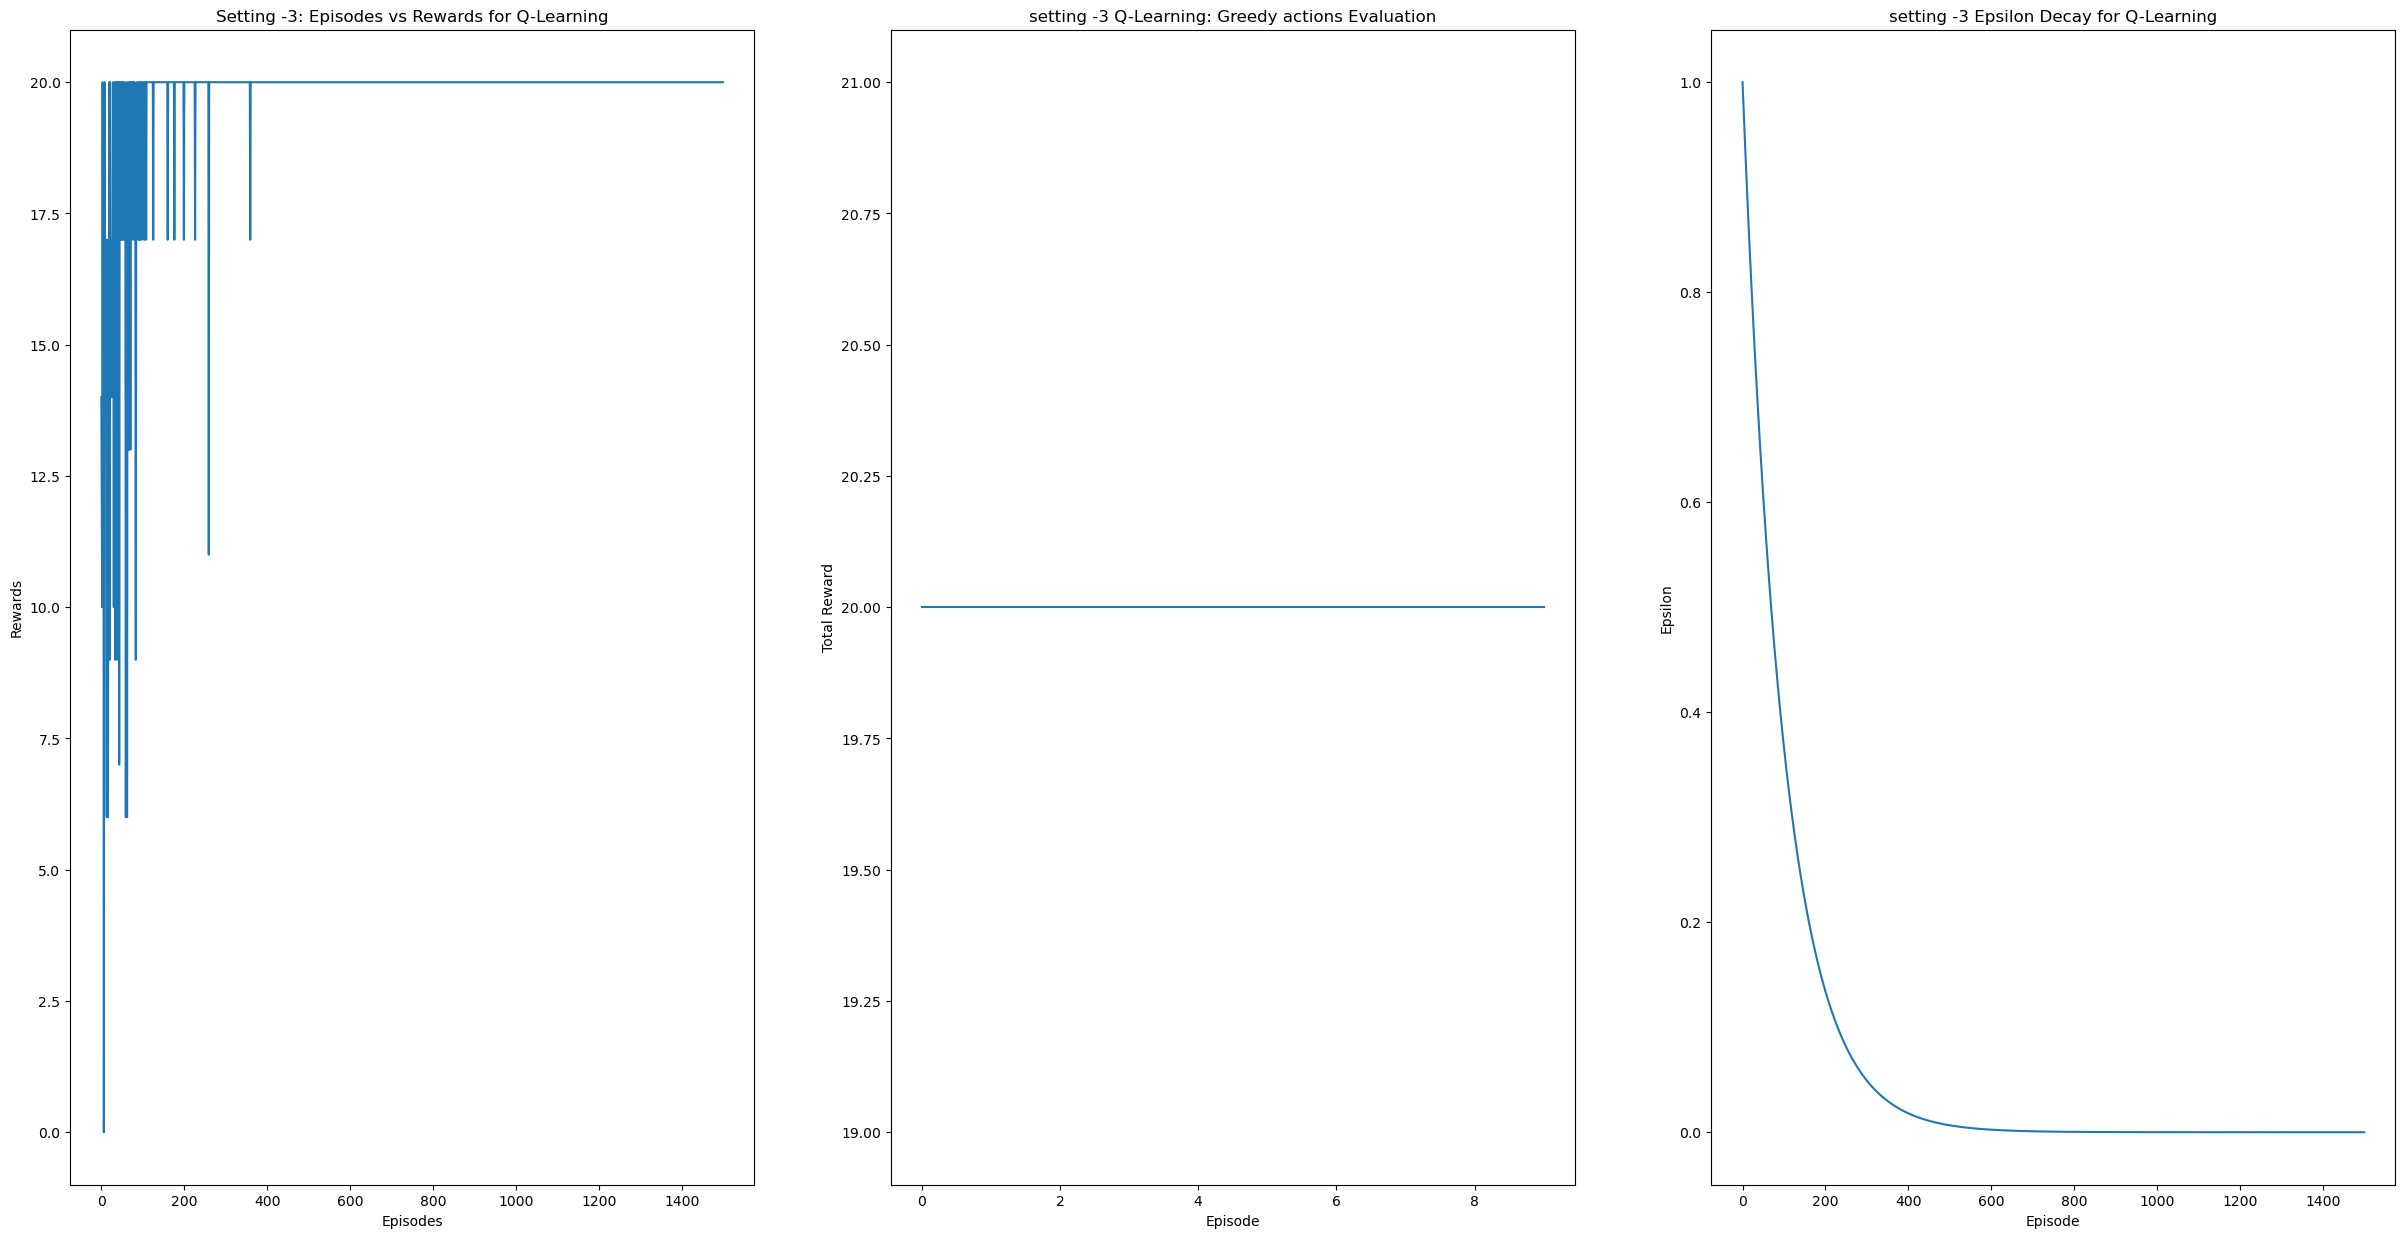

In [16]:
#setting -3
q_agent3 = Qlearning(env,alpha=0.05, gamma=0.99, epsilon=1,epsilon_decay=0.99)
q3=q_agent3.train(150,1500)

#evaluating the Q-Learning for setting-3
print("Evaluating Q-Learning setting-3")
print()
total_rewards_Q3=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent3.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q3.append(ep_reward)


epsilon_list_Q3 = []
for ep in range(len(q3)):
    epsilon_list_Q3.append(q_agent3.epsilon*(q_agent3.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q3)
plt.title('Setting -3: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -3 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q3)
plt.title('setting -3 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning setting-4



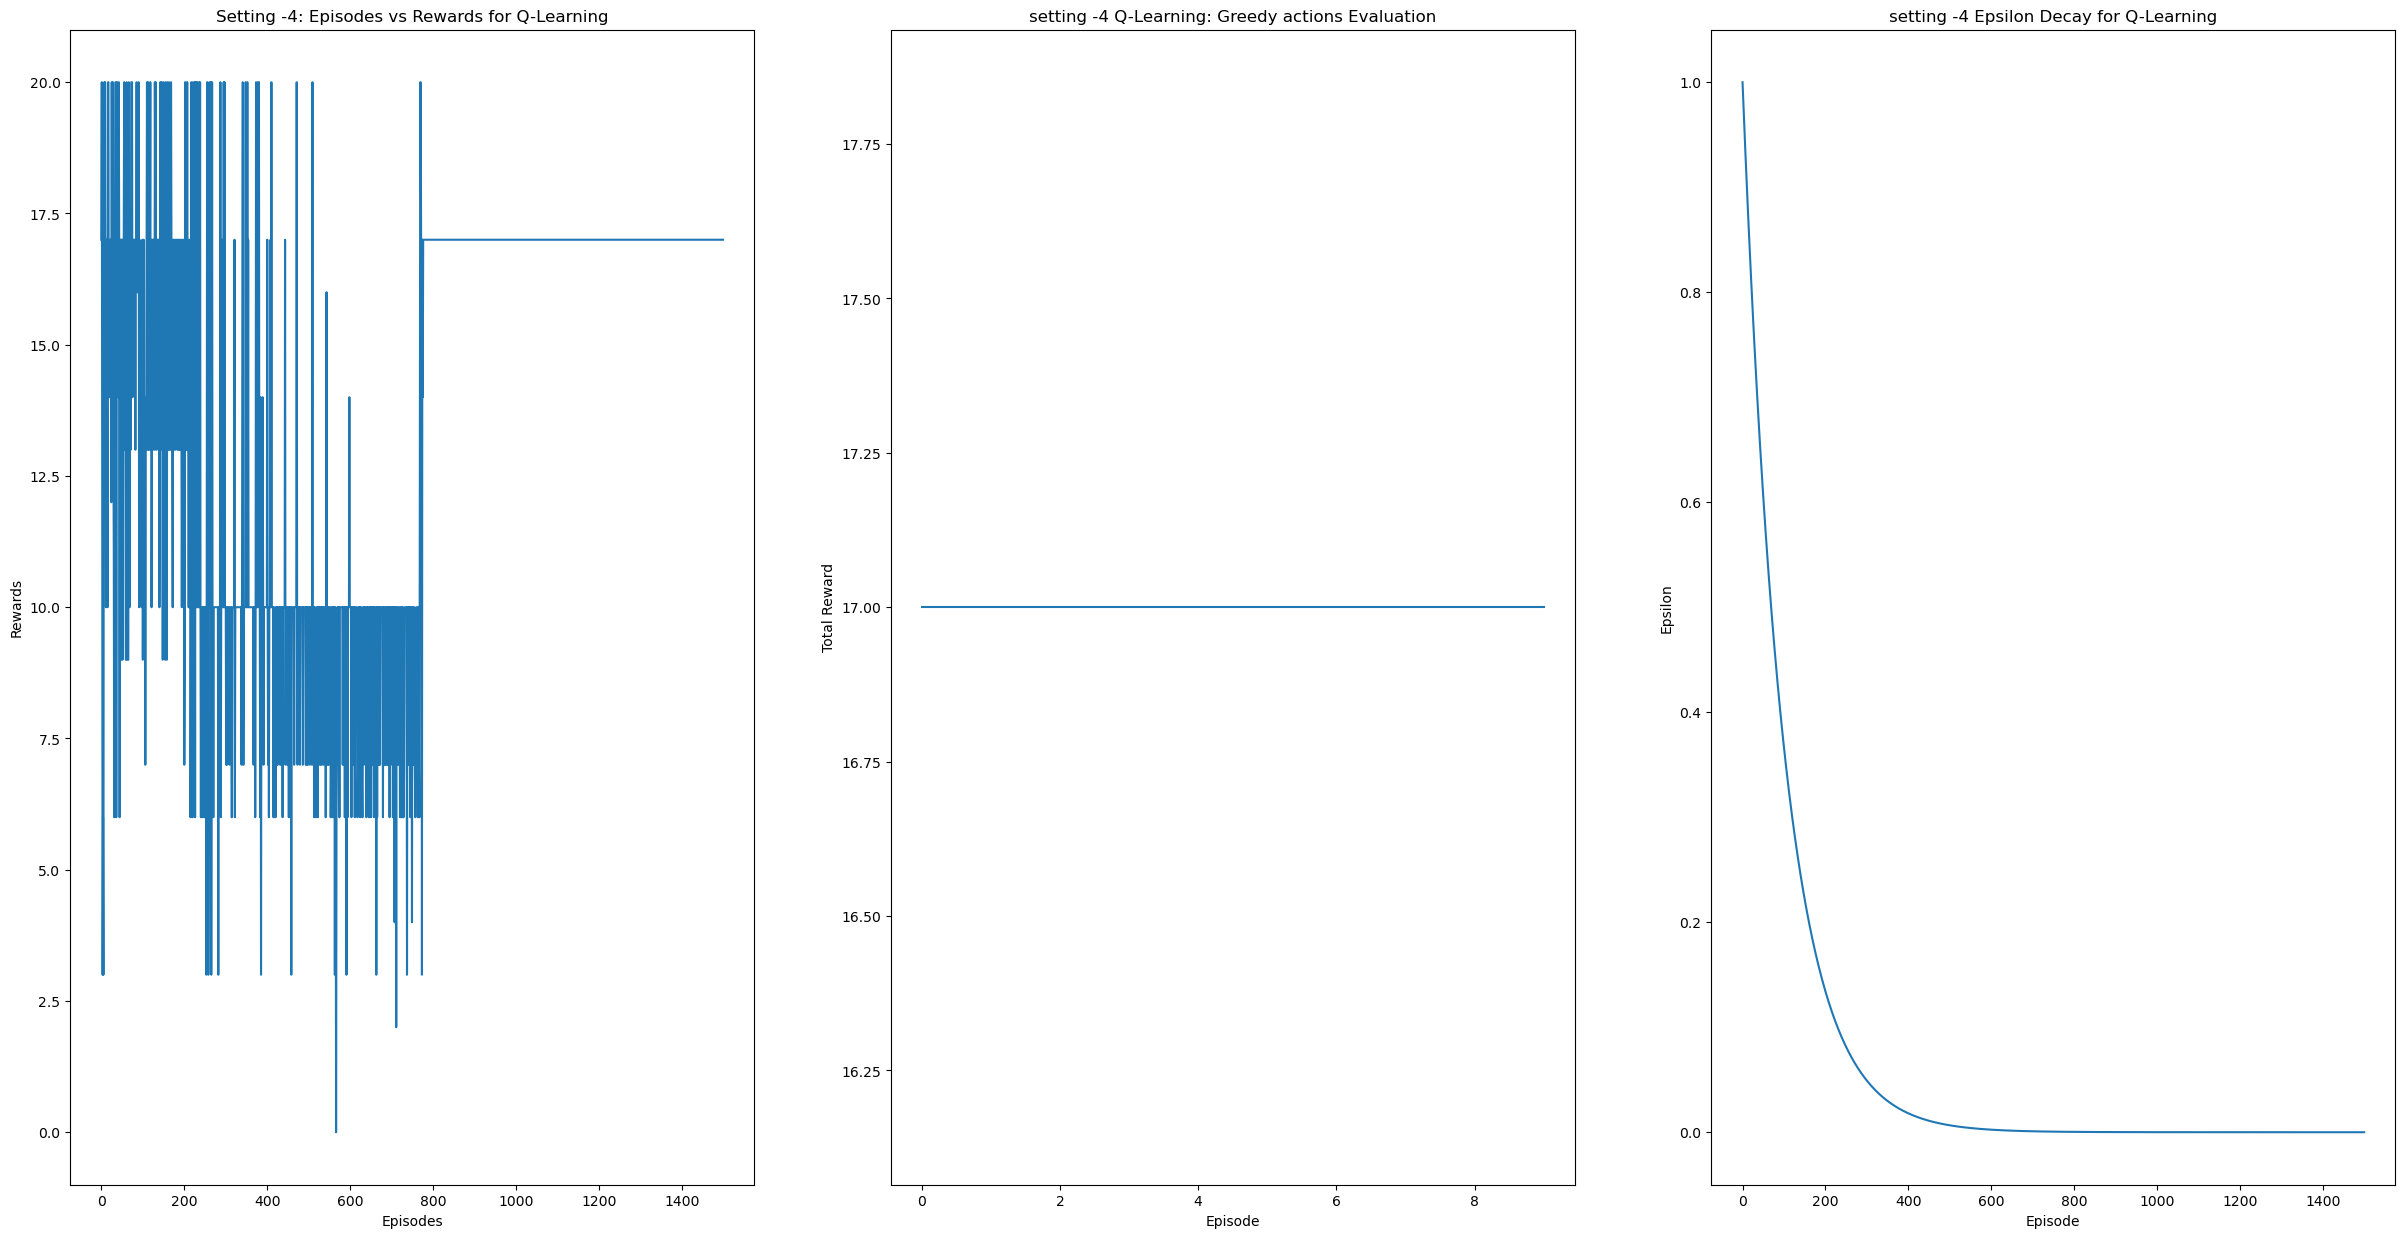

In [17]:
#setting -4
q_agent4 = Qlearning(env,alpha=0.15, gamma=0.99, epsilon=1,epsilon_decay=0.99)
q4=q_agent4.train(100,1500)

#evaluating the Q-Learning for setting-4
print("Evaluating Q-Learning setting-4")
print()
total_rewards_Q4=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent4.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q4.append(ep_reward)


epsilon_list_Q4 = []
for ep in range(len(q4)):
    epsilon_list_Q4.append(q_agent4.epsilon*(q_agent4.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q4)
plt.title('Setting -4: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q4)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -4 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q4)
plt.title('setting -4 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning setting-5



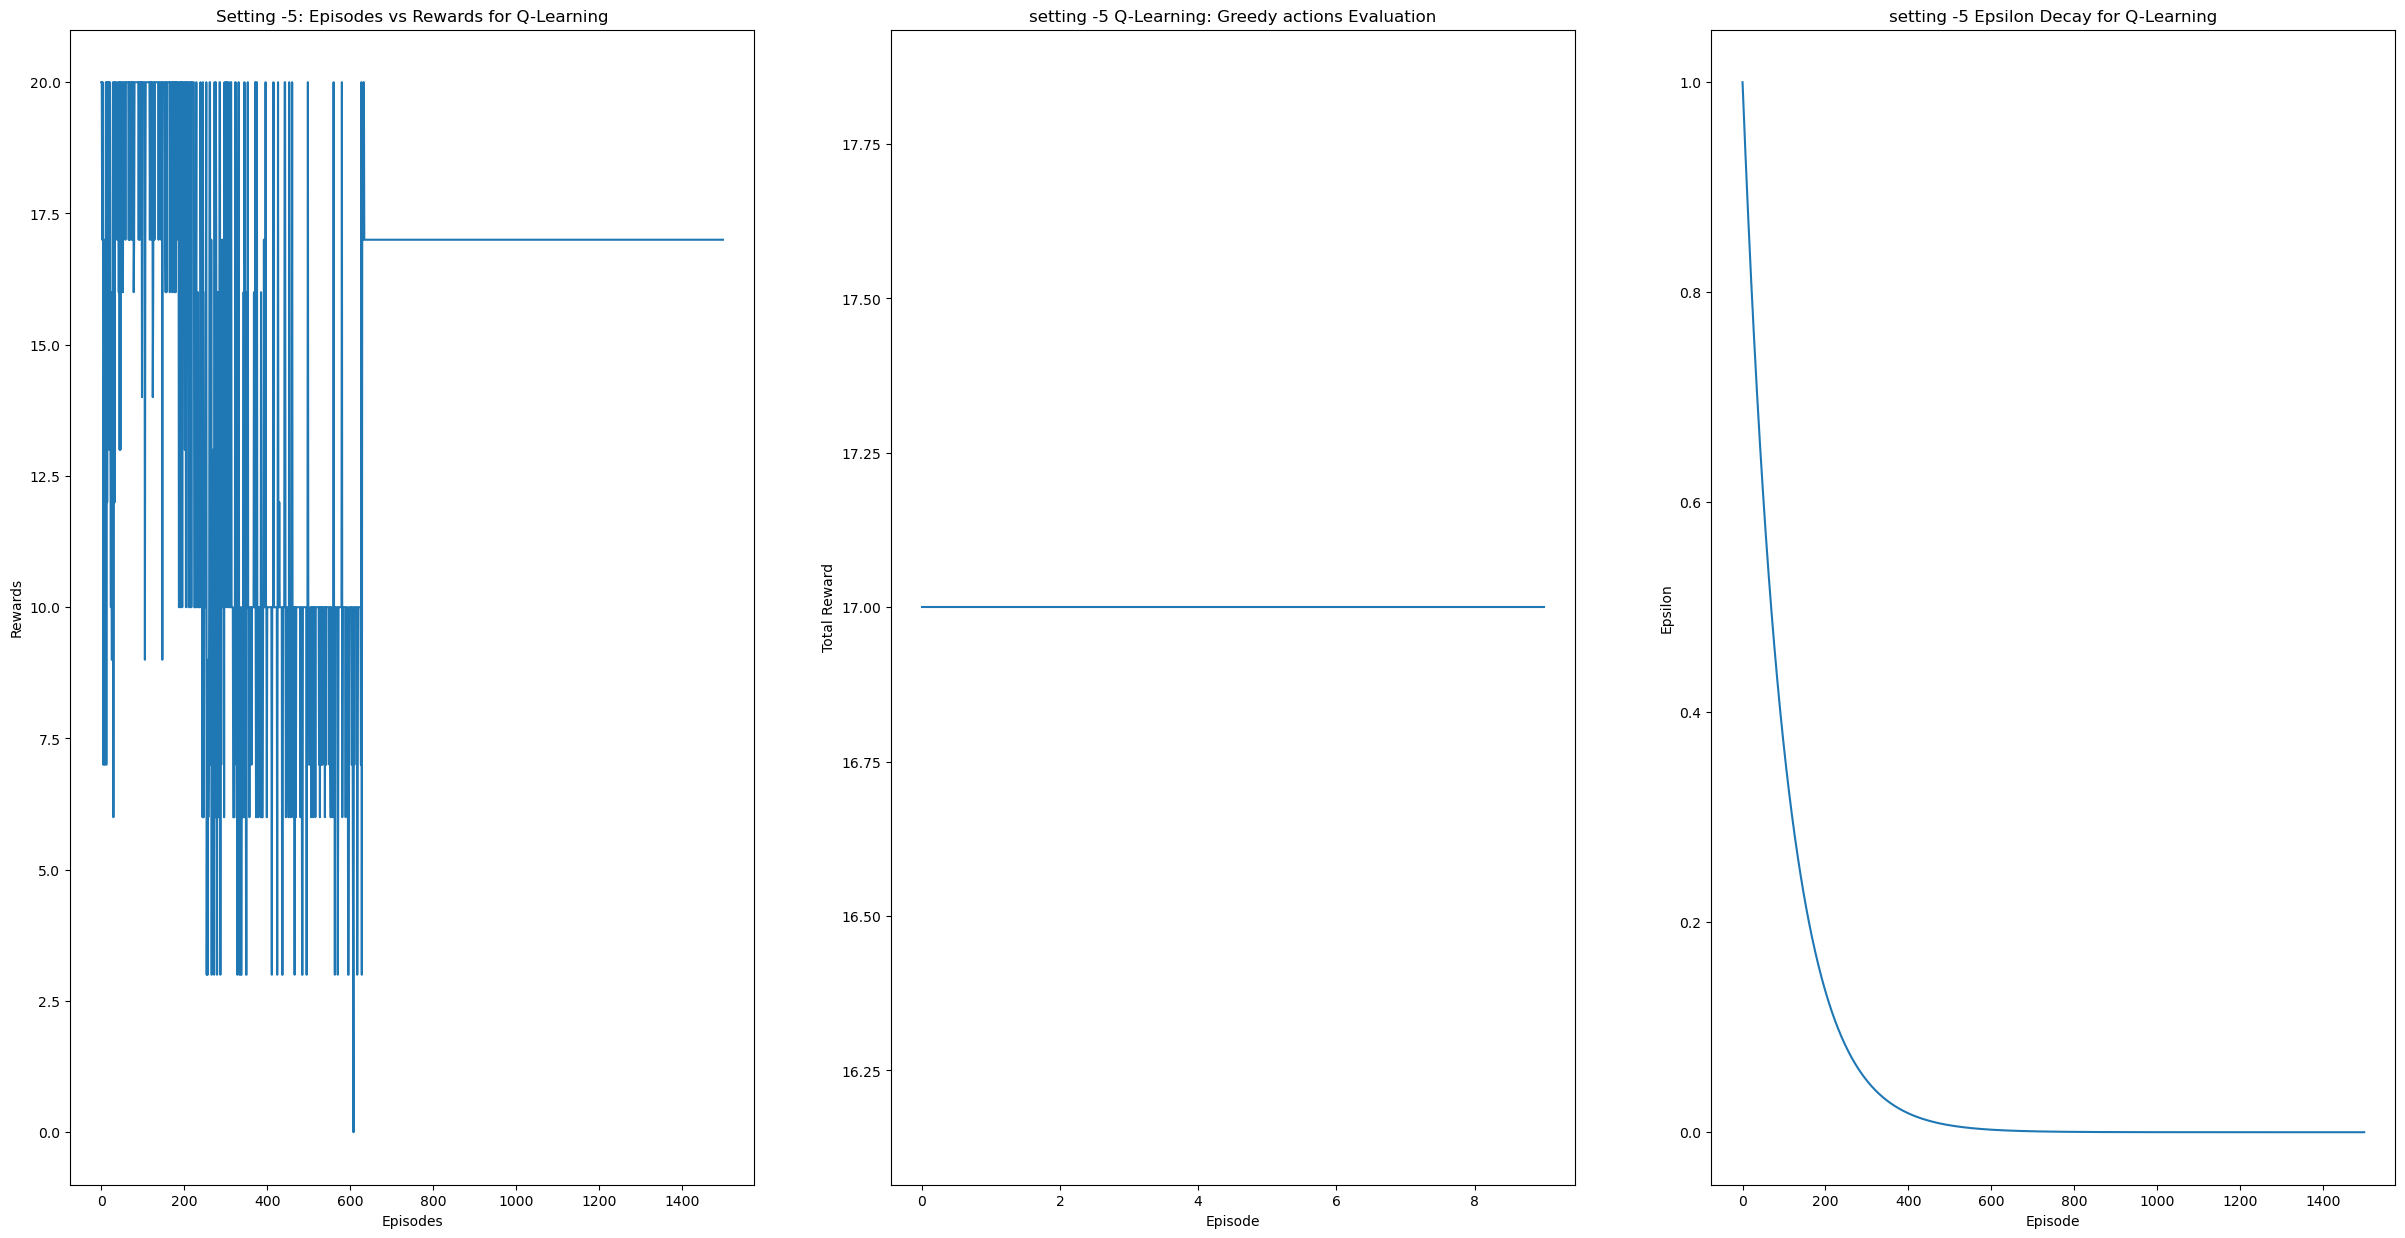

In [18]:
#setting -5
q_agent5 = Qlearning(env,alpha=0.07, gamma=0.99, epsilon=1,epsilon_decay=0.99)
q5=q_agent5.train(100,1500)

#evaluating the Q-Learning for setting-5
print("Evaluating Q-Learning setting-5")
print()
total_rewards_Q5=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent5.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q5.append(ep_reward)


epsilon_list_Q5 = []
for ep in range(len(q5)):
    epsilon_list_Q5.append(q_agent5.epsilon*(q_agent5.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q5)
plt.title('Setting -5: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q5)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -5 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q5)
plt.title('setting -5 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

Evaluating Q-Learning setting-6



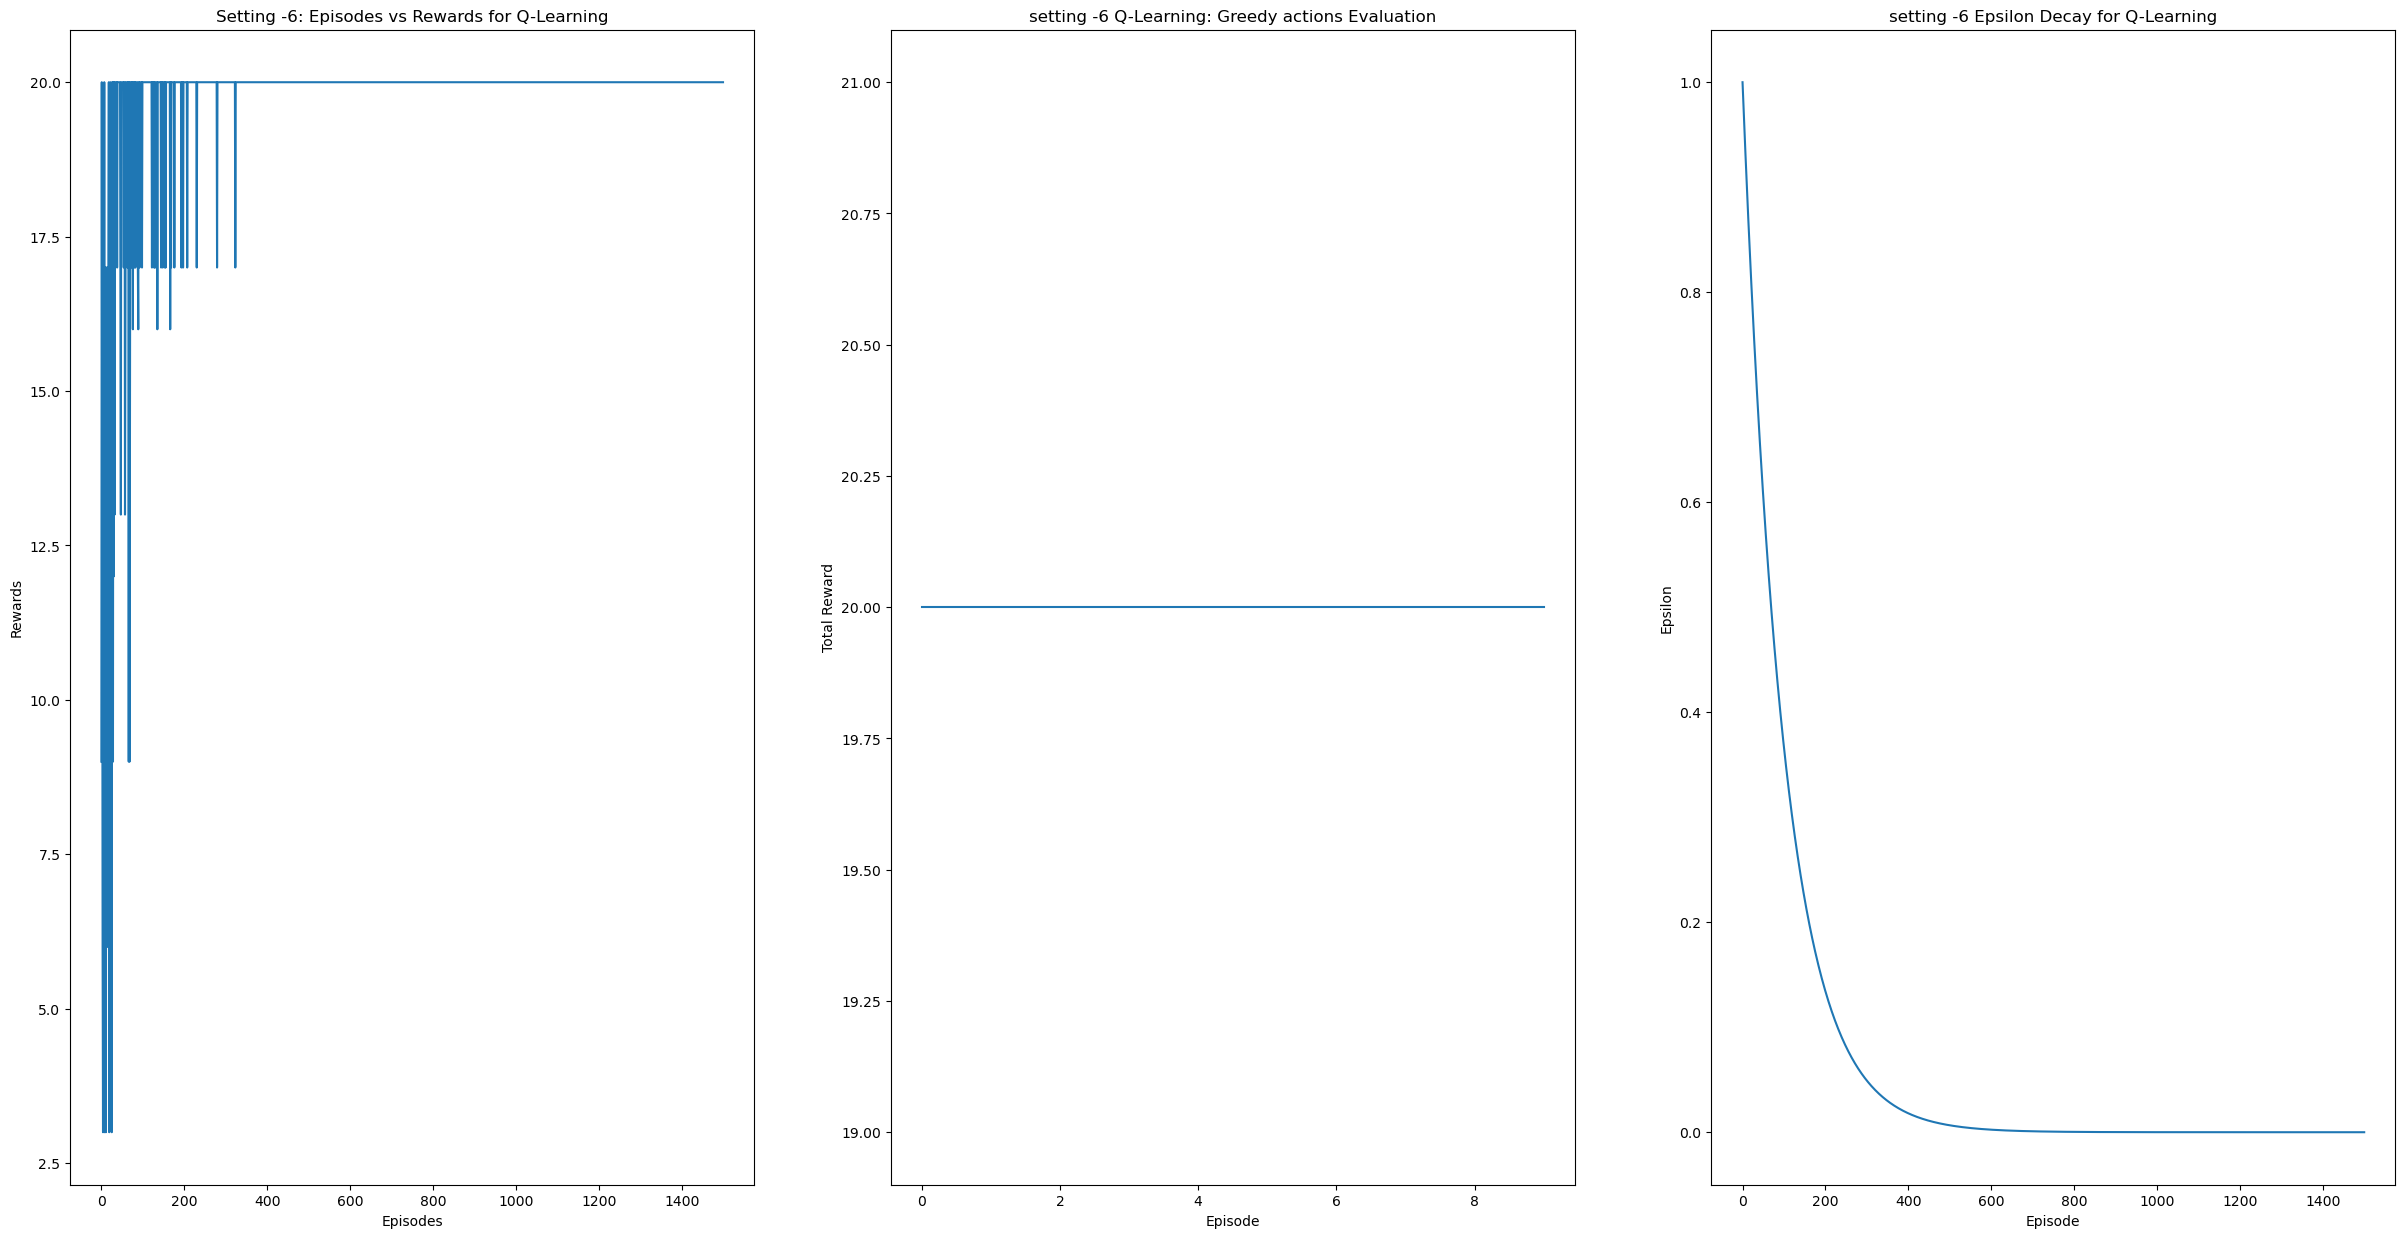

In [19]:
#setting -6
q_agent6 = Qlearning(env,alpha=0.1, gamma=0.9, epsilon=1,epsilon_decay=0.99)
q6=q_agent6.train(100,1500)

#evaluating the Q-Learning for setting-6
print("Evaluating Q-Learning setting-6")
print()
total_rewards_Q6=[]
for i in range(10):
    state = env.reset()
    ep_reward = 0
    while True:
        if env.current_state == env.terminal_state:
            break
        action = q_agent6.epsilon_greedy(state, 0)
        next_state, _, reward = env.step(action)
        state = next_state
        ep_reward += reward
    total_rewards_Q6.append(ep_reward)


epsilon_list_Q6 = []
for ep in range(len(q6)):
    epsilon_list_Q6.append(q_agent6.epsilon*(q_agent6.epsilon_decay**ep))
    
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(q6)
plt.title('Setting -6: Episodes vs Rewards for Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')   
plt.subplot(1,3,2)
plt.plot(total_rewards_Q6)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('setting -6 Q-Learning: Greedy actions Evaluation')
plt.subplot(1,3,3)
plt.plot(epsilon_list_Q6)
plt.title('setting -6 Epsilon Decay for Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

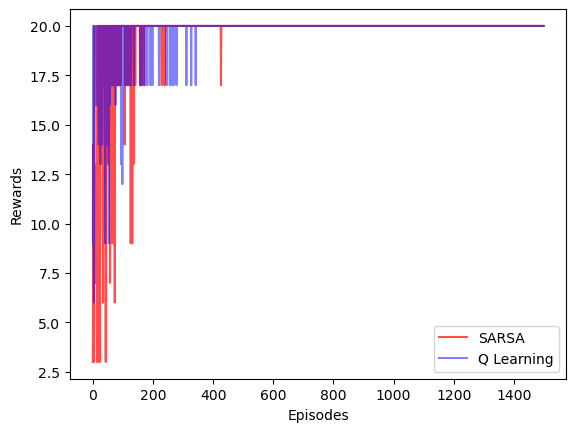

In [26]:
plt.plot(p,color='red',label='SARSA',alpha=0.7)
plt.plot(q,color='blue',label='Q Learning',alpha=0.5)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.show()

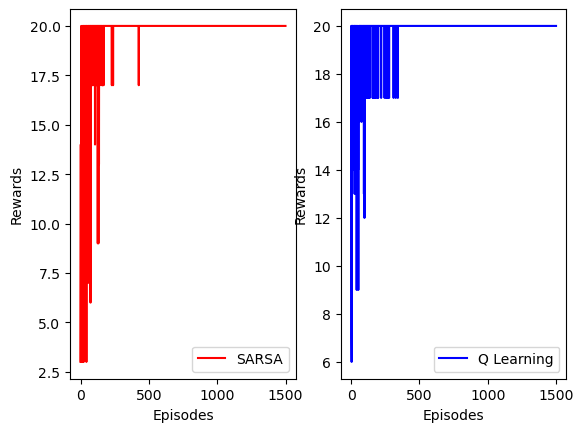

In [28]:
##### plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(p,color='r',label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()

plt.subplot(122)
plt.plot(q,color='b',label='Q Learning')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.show()


# References:
https://github.com/michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-/blob/master/Gridworld.ipynb
https://github.com/michaeltinsley/Gridworld-with-Q-Learning-Reinforcement-Learning-/blob/master/Gridworld.ipynb
https://builtin.com/machine-learning/sarsa